In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from rcgp.morcgp import MOGPRegressor, MORCGPRegressor, MOGPRegressor_NC, MORCGPRegressor_NC, MORCGPRegressor_NC_fixed_weights, MORCGPRegressor_fixed_weights, MORCGPRegressor_PM, MORCGPRegressor2, MORCGP
from rcgp.rcgp import RCGPRegressor
from rcgp.kernels import ConstantMean, RBFKernel, SineMean
import numpy as np
from sklearn.covariance import MinCovDet

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
plt.rcParams.update({
    "text.usetex": True,         
    "font.family": "serif",       
    "text.latex.preamble": r"\usepackage{amsmath}",
    'font.size': 26,         
    'axes.labelsize': 22,    
    'xtick.labelsize': 24,   
    'ytick.labelsize': 24,  
    'legend.fontsize': 24,
    'lines.linewidth': 6,    
    'lines.markersize': 7,
    'axes.titlesize': 24  
})

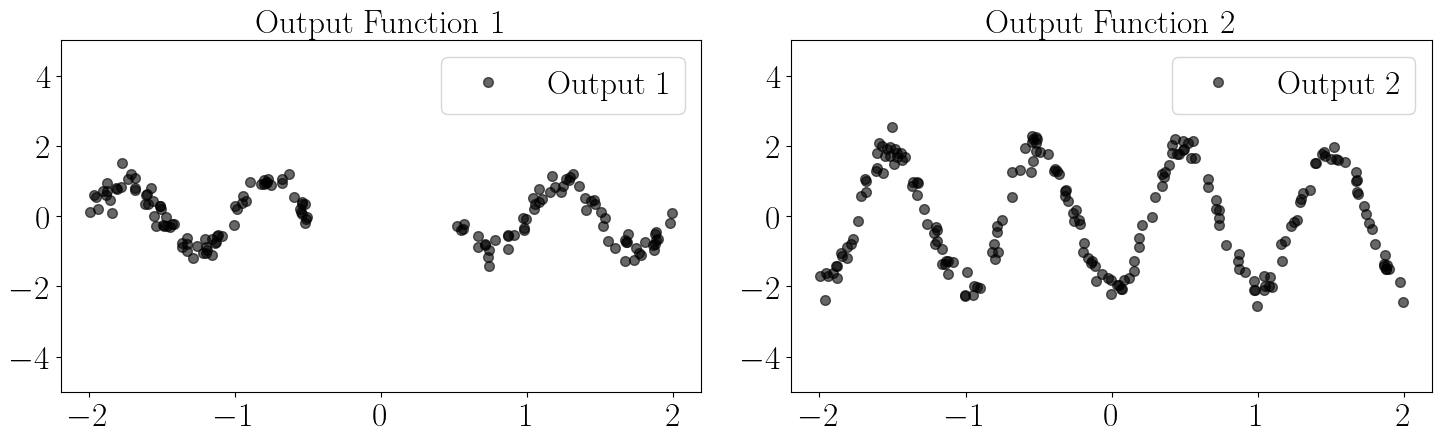

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(15)

# Parameters
n_points = 200
noise_variance = 0.05

# Input
x_train = np.sort(np.random.uniform(-2, 2, n_points)).reshape(-1, 1)

# Generate two-channel outputs
y_train = np.zeros((n_points, 2))
y_train[:, 0] = np.sin(2 * np.pi * x_train.flatten()) + np.random.normal(0, np.sqrt(noise_variance), n_points)
y_train[:, 1] = 2 * np.sin(2 * np.pi * (x_train.flatten() - 0.25)) + np.random.normal(0, np.sqrt(noise_variance), n_points)

# Centering the data (optional)
y_train -= np.mean(y_train, axis=0)

# Remove points in the first channel where x is between -0.5 and 0.5
mask = ((x_train.flatten() >= -0.5) & (x_train.flatten() <= 0.5))
y_train[mask, 0] = np.nan  # Set to NaN to indicate missing values

# Test points for smooth plotting
x_test = np.linspace(0, 1, 1000).reshape(-2, 2)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i in range(2):
    axs[i].plot(x_train.flatten(), y_train[:, i], 'o', color='black', alpha=0.6, label=f'Output {i+1}')
    axs[i].set_title(f"Output Function {i+1}")
    axs[i].set_ylim([-5, 5])
    axs[i].legend()

plt.tight_layout()
plt.show()


In [20]:
mogp = MOGPRegressor(mean = 0, length_scale=0.1, noise = noise_variance, A=A)
# mogp = MOGPRegressor_NC(mean = 0, length_scale=0.1, noise = 0.04, A=A)
mogp.fit(x_train, y_train)

# Predict on test points
x_test = np.linspace(0, 1, 100).reshape(-1, 1)
mu_mogp, var_mogp = mogp.predict(x_test)
std_mogp = np.sqrt(var_mogp + mogp.noise)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i in range(2):
    axs[i].plot(x_train.flatten(), y_train[:, i], 'o', color='black', label=f'Observed Data')
    axs[i].plot(x_test.flatten(), mu_mogp[:, i], '-', color='blue', label=f'Predicted Mean')
    axs[i].fill_between(x_test.flatten(), mu_mogp[:, i] - 2*std_mogp[:, i], mu_mogp[:, i] + 2*std_mogp[:, i], color='blue', alpha=0.2, label=f'±2 Std. Dev.')

    axs[i].set_title(f"Output Function {i+1}")
    axs[i].set_ylim([-6, 6])
    # axs[i].legend()

plt.tight_layout()
plt.show()

NameError: name 'A' is not defined

Random Seed: 0


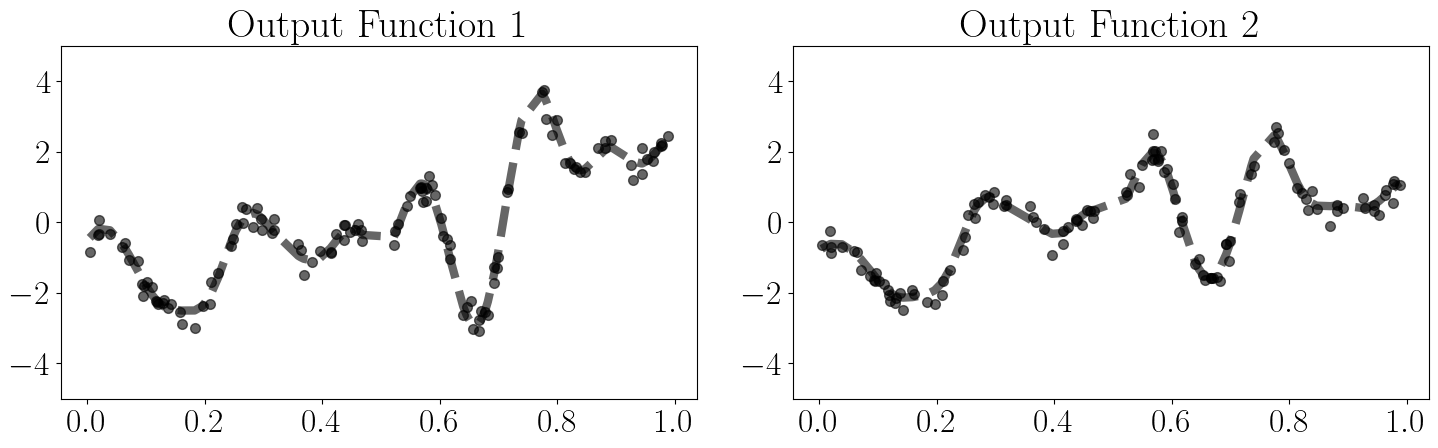

Random Seed: 1


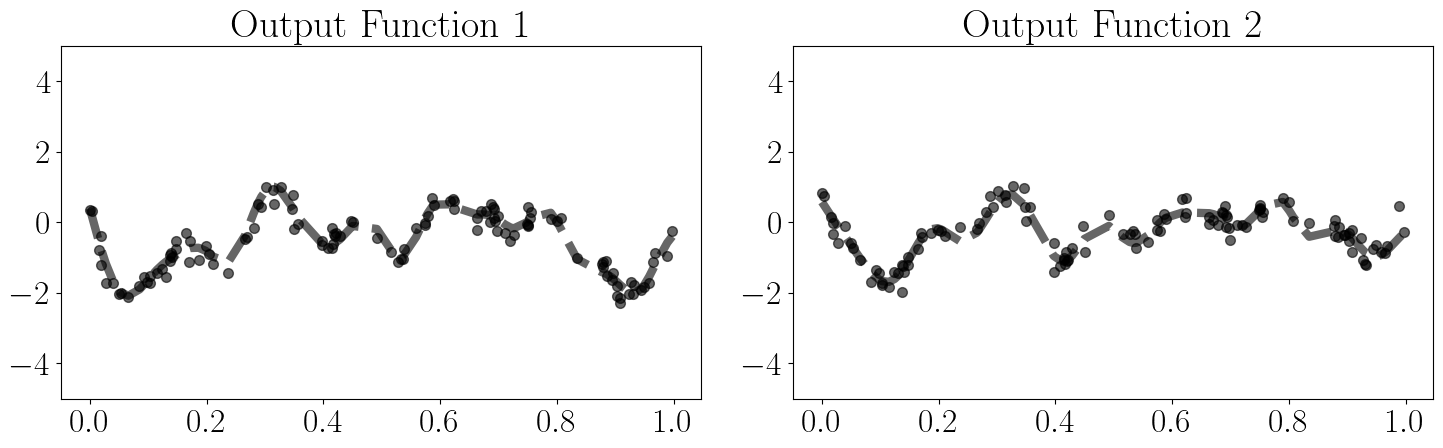

Random Seed: 2


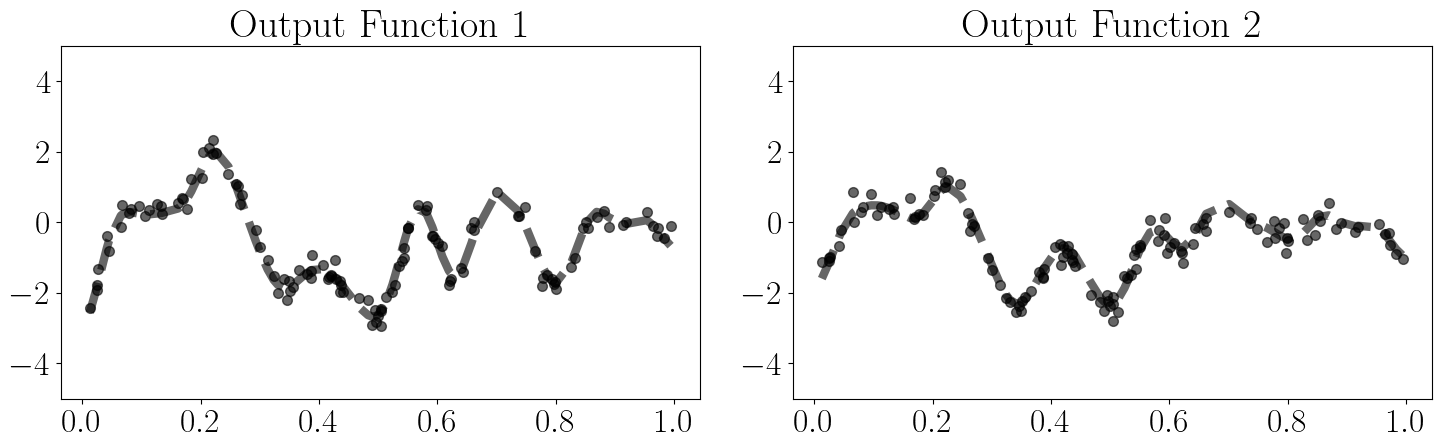

Random Seed: 3


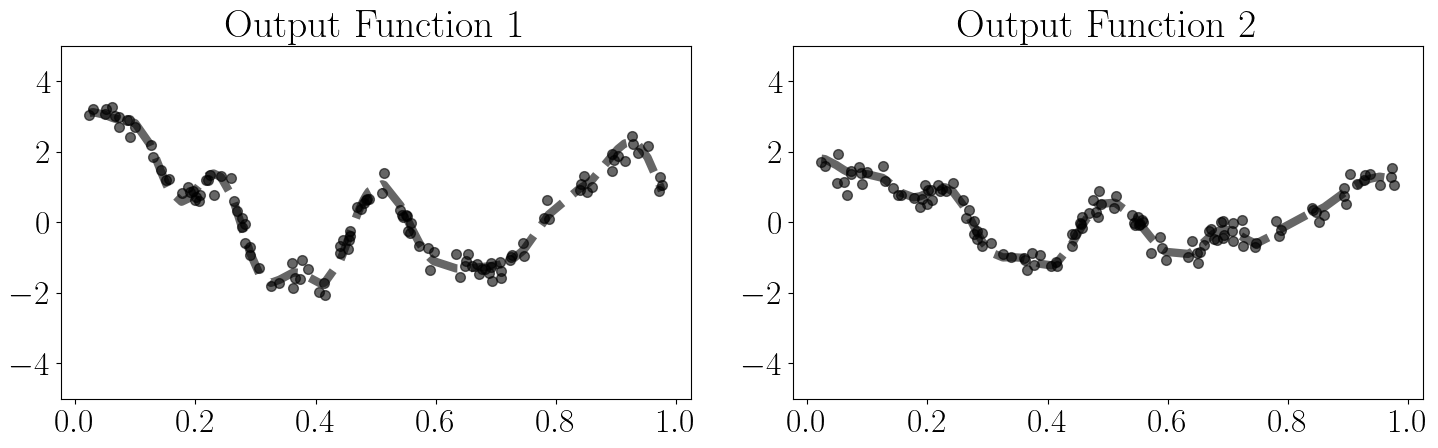

Random Seed: 4


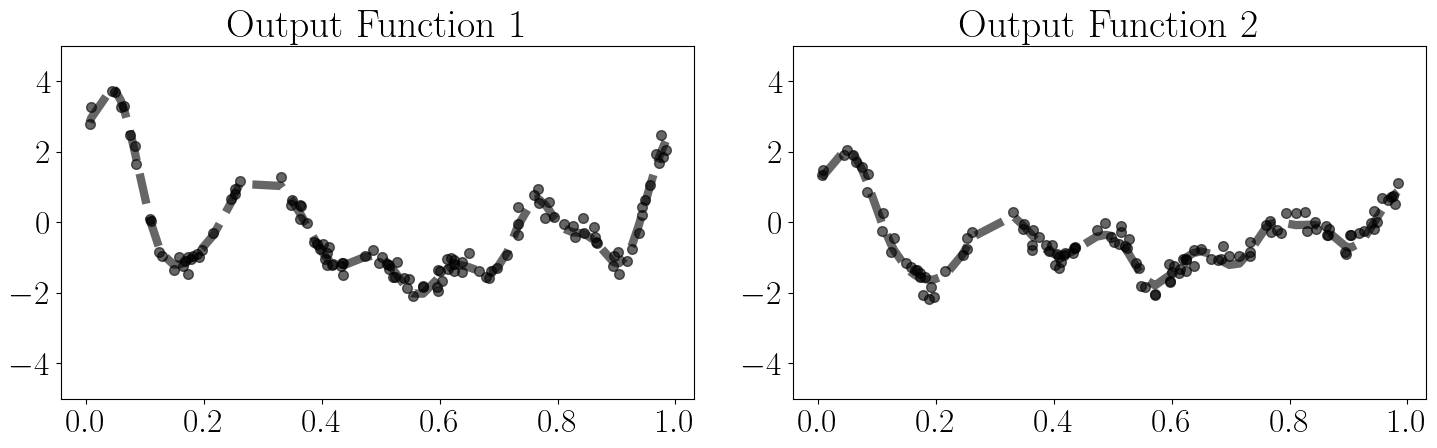

Random Seed: 5


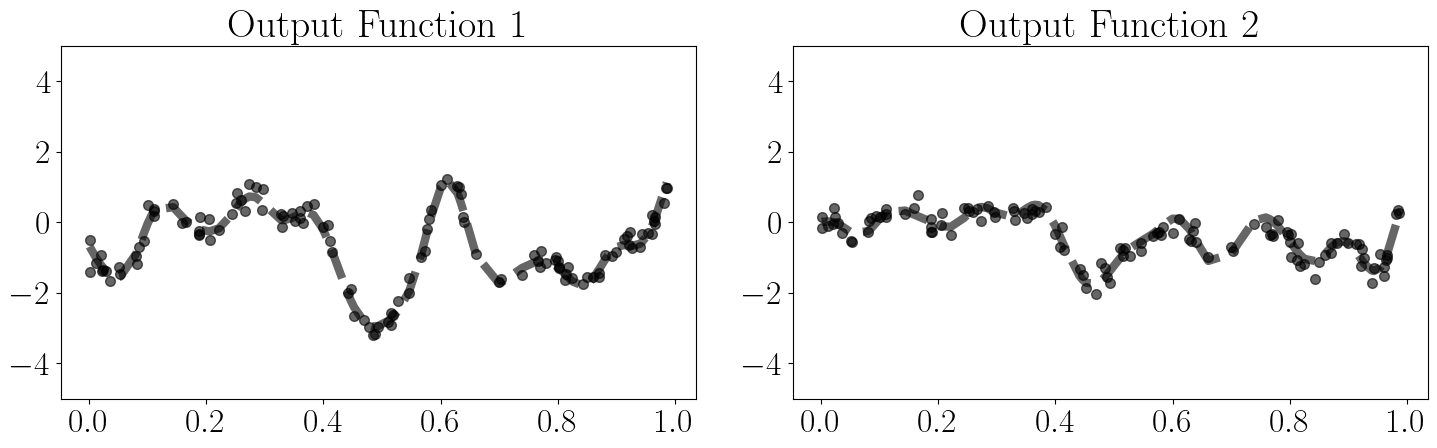

Random Seed: 6


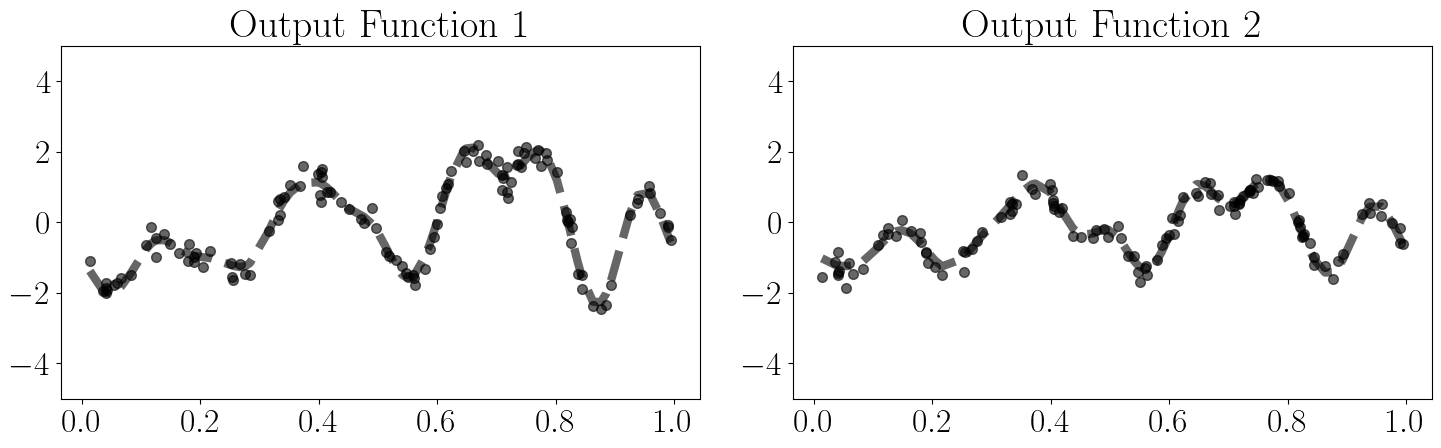

Random Seed: 7


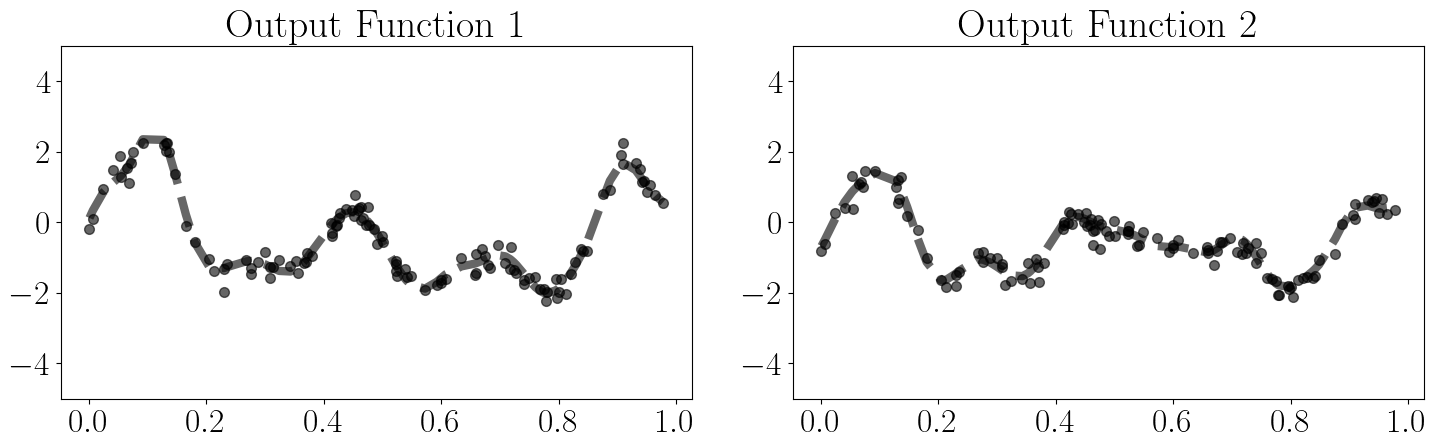

Random Seed: 8


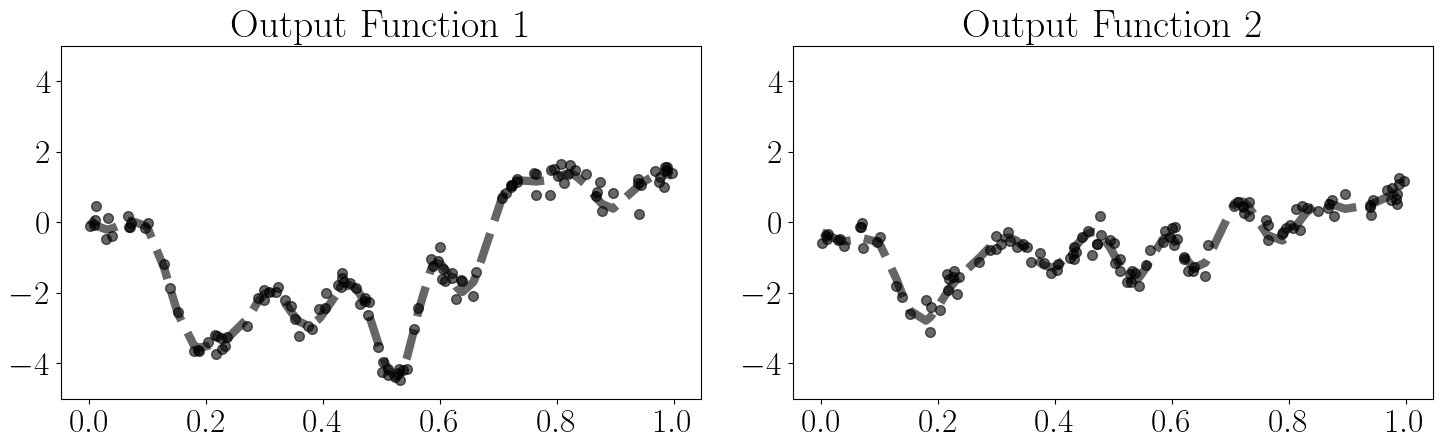

Random Seed: 9


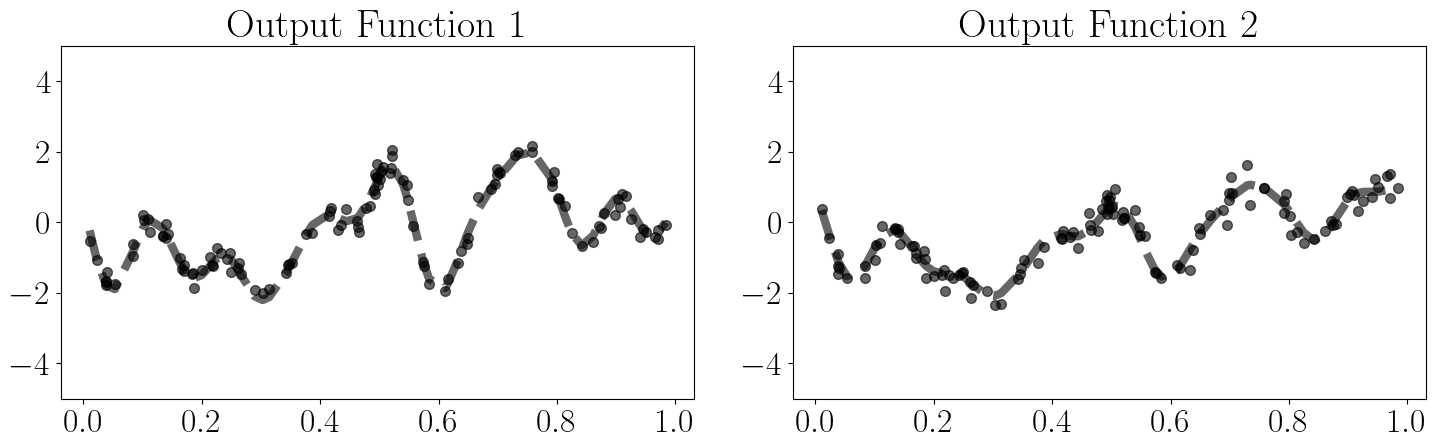

Random Seed: 10


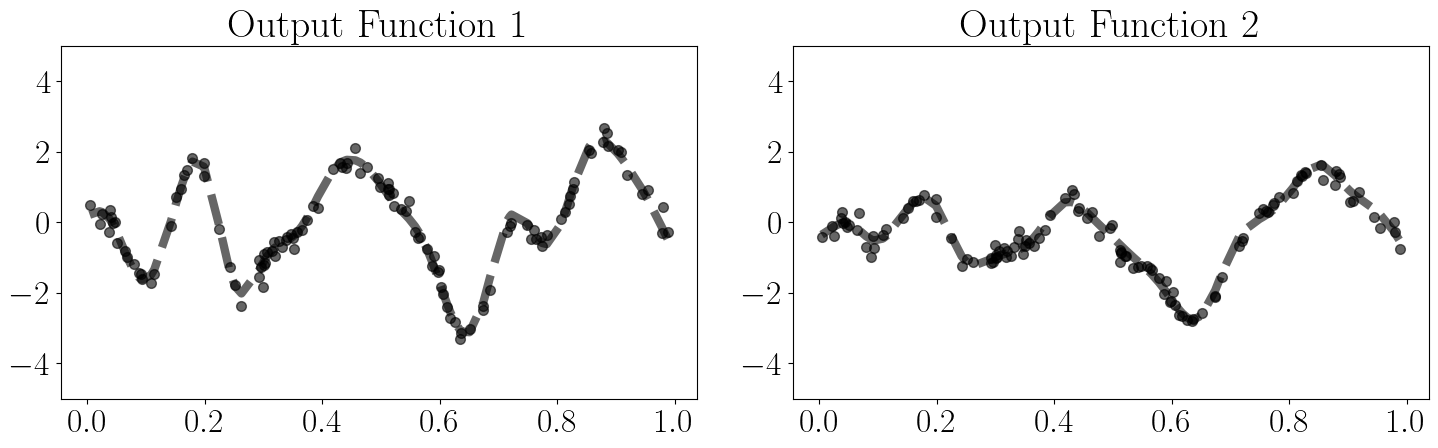

Random Seed: 11


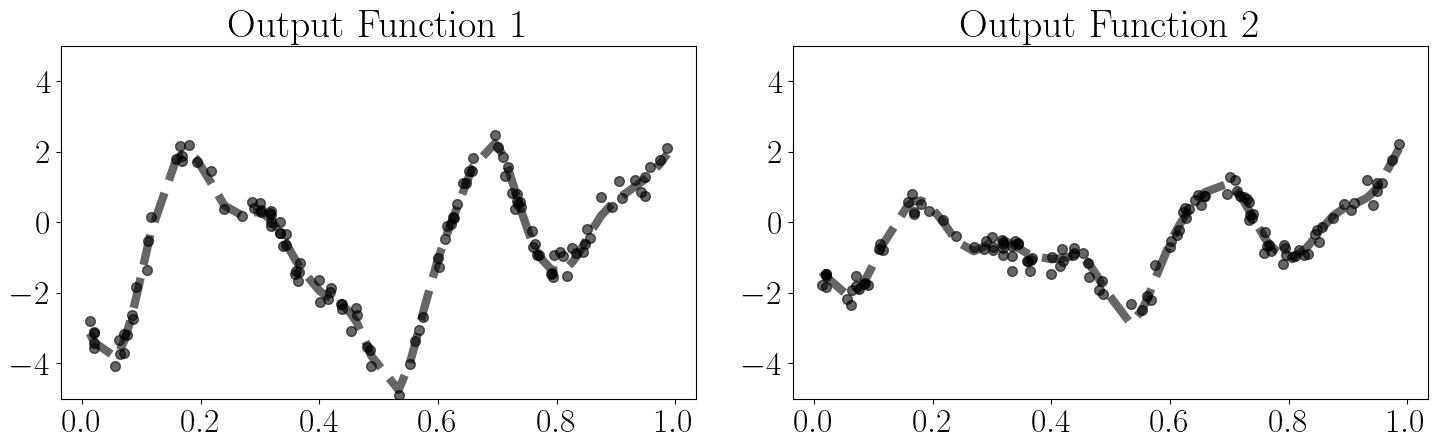

Random Seed: 12


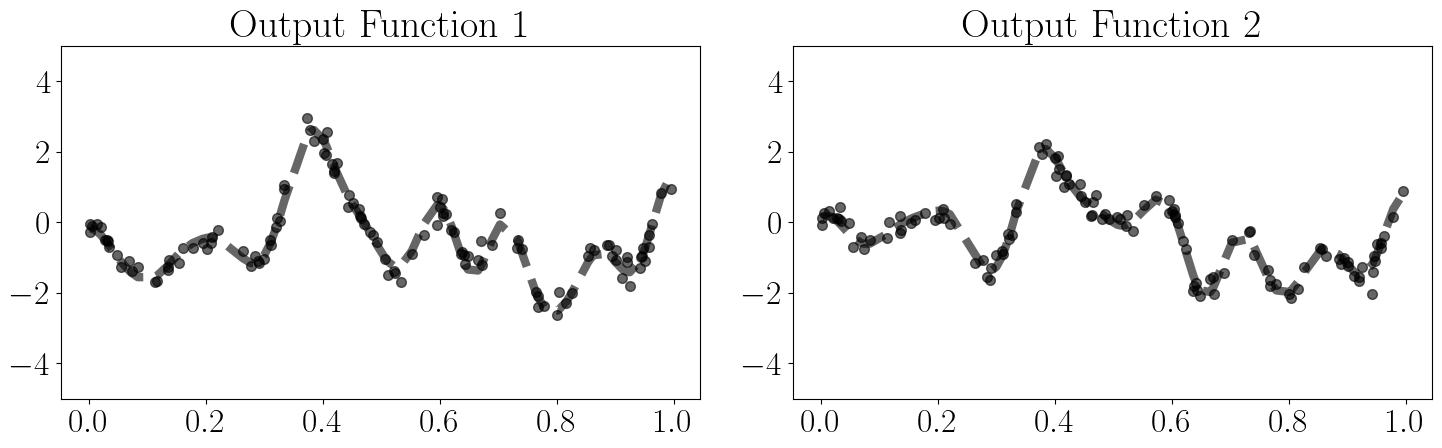

Random Seed: 13


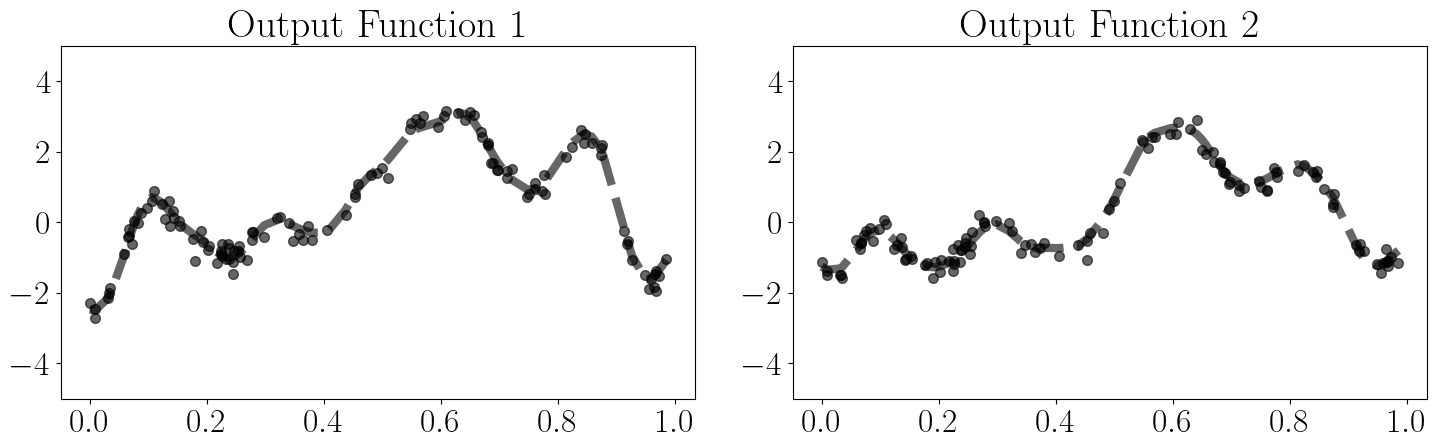

Random Seed: 14


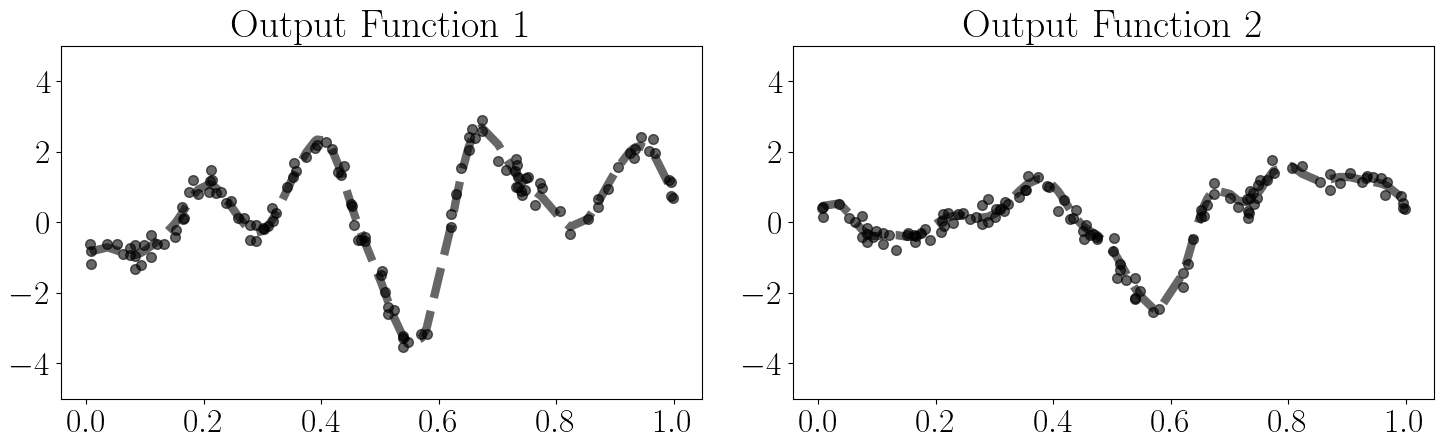

Random Seed: 15


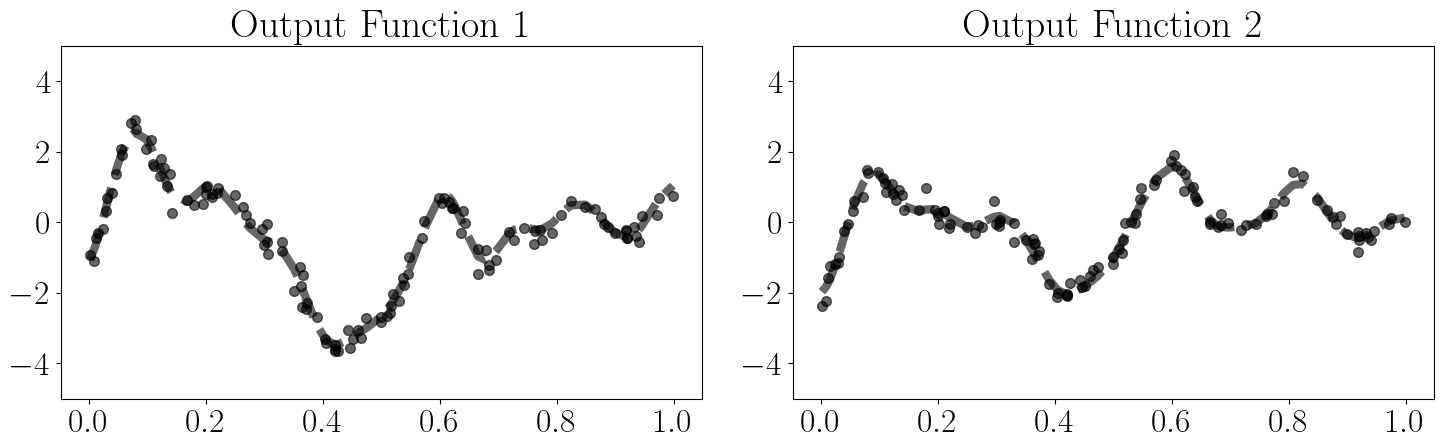

Random Seed: 16


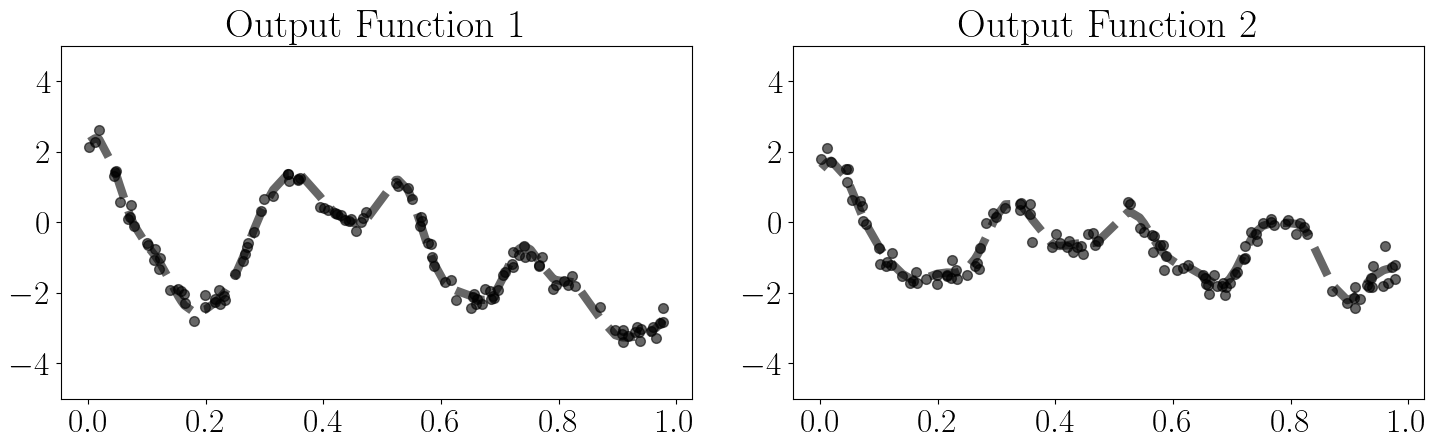

Random Seed: 17


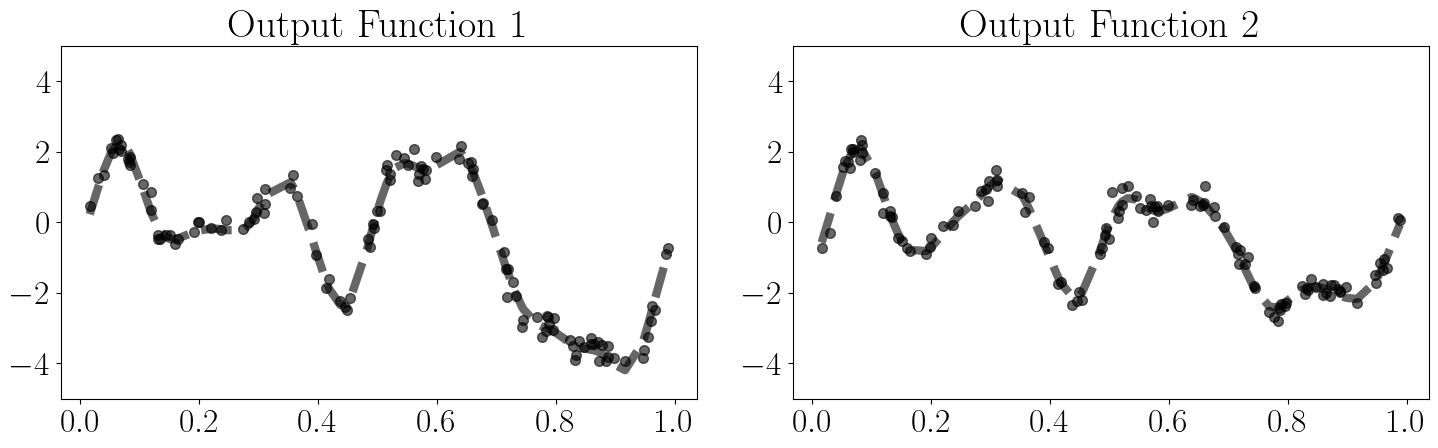

Random Seed: 18


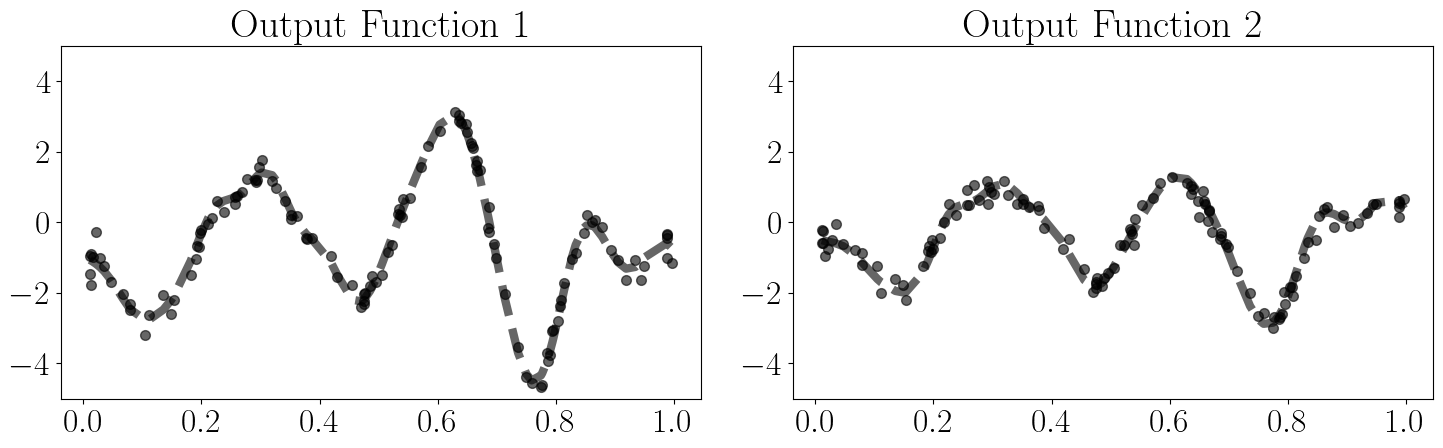

Random Seed: 19


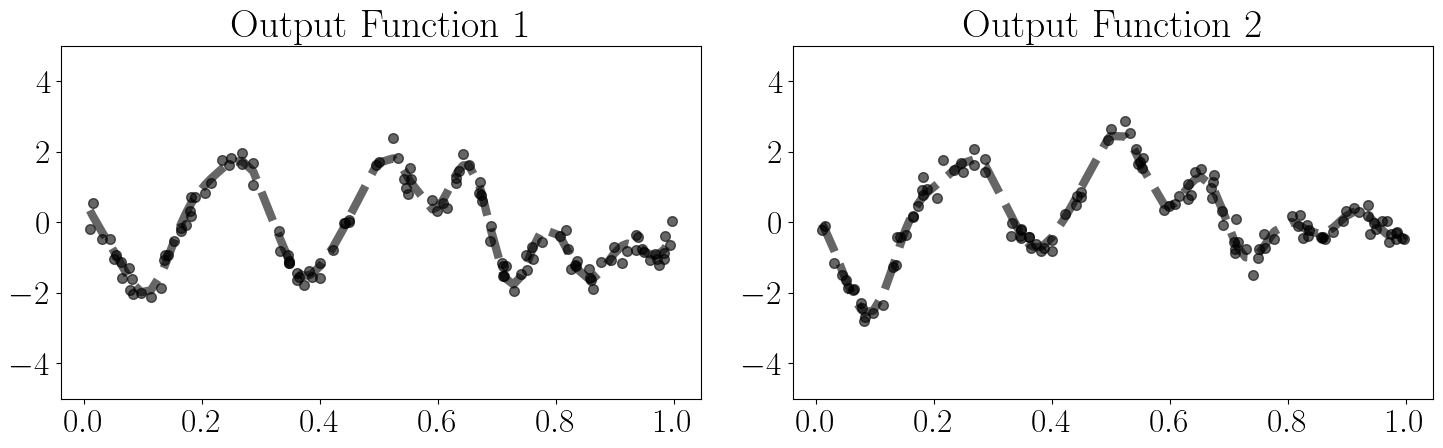

Random Seed: 20


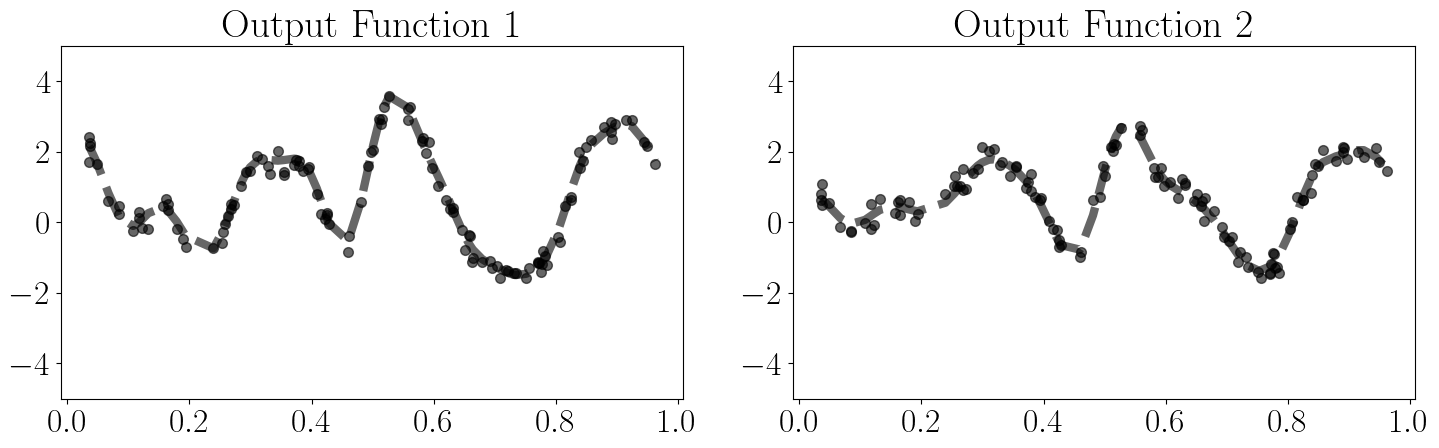

Random Seed: 21


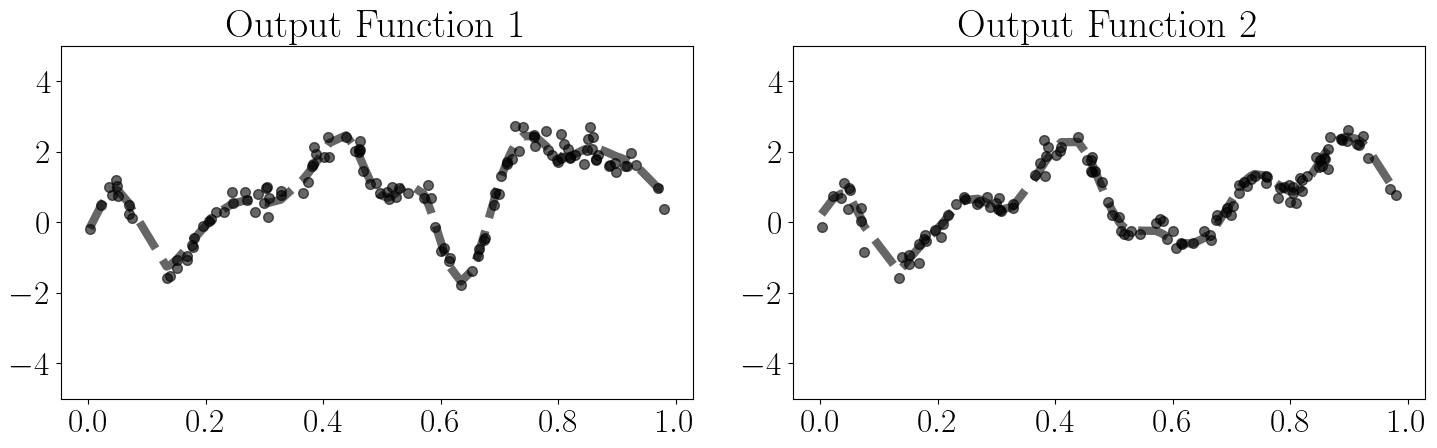

Random Seed: 22


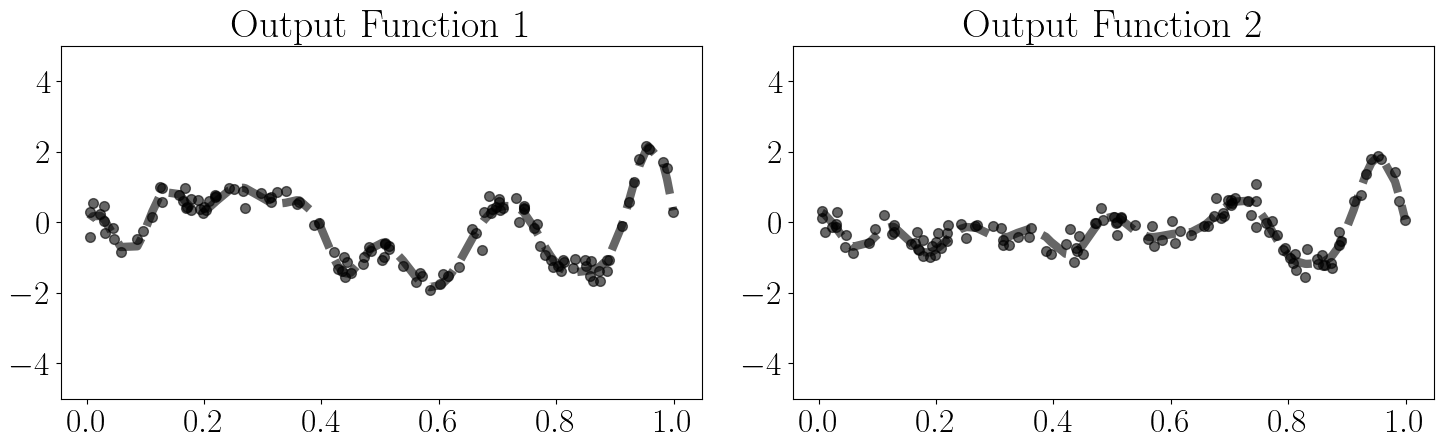

Random Seed: 23


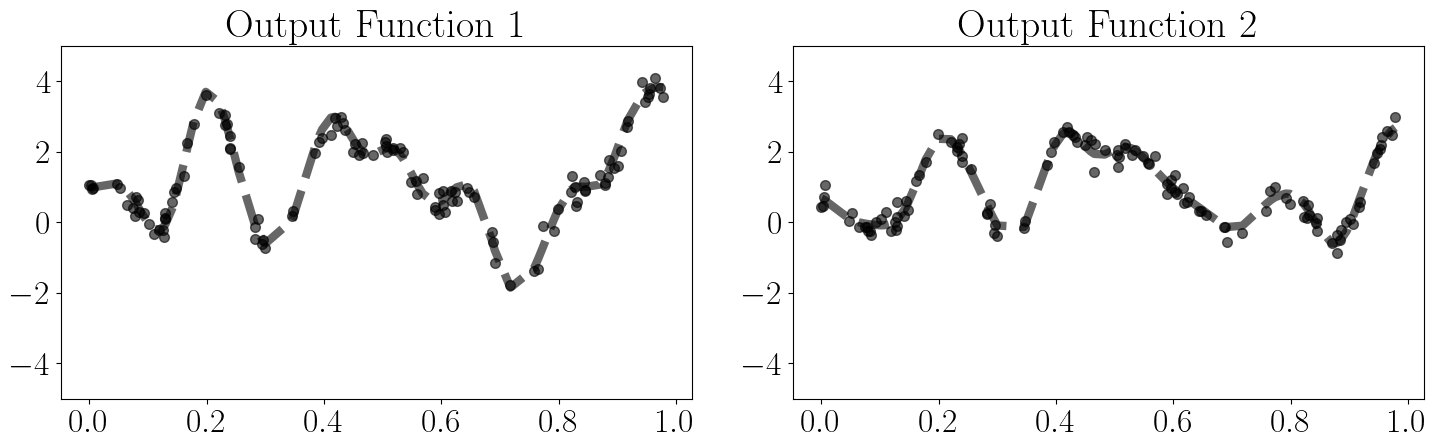

Random Seed: 24


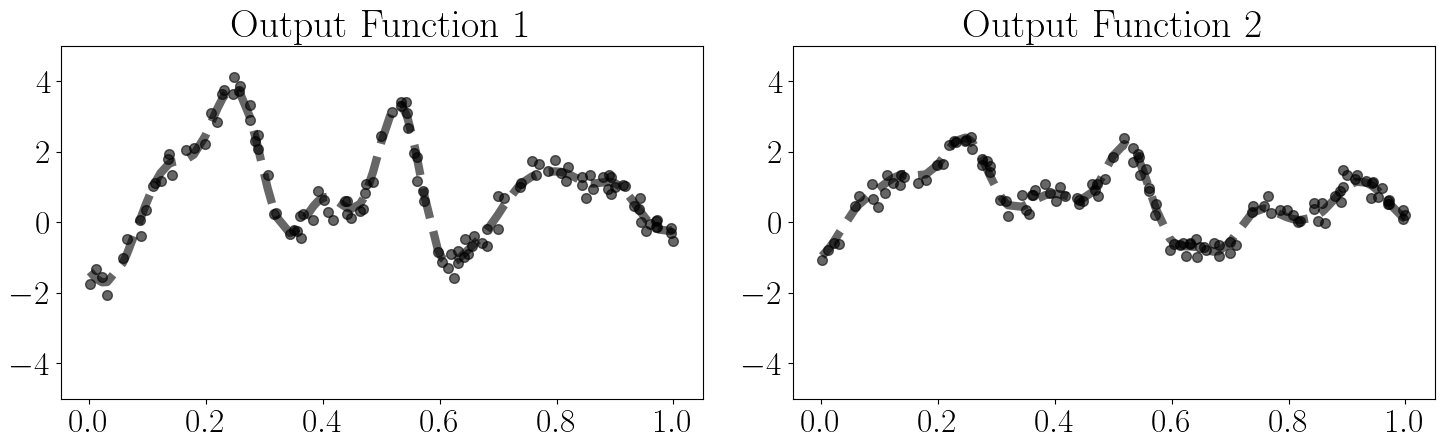

Random Seed: 25


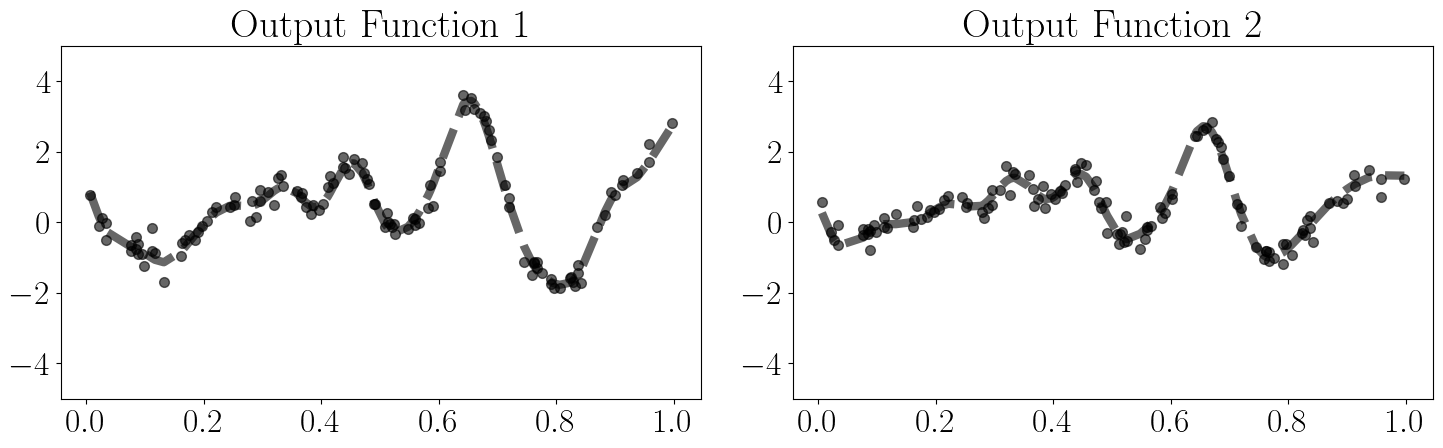

Random Seed: 26


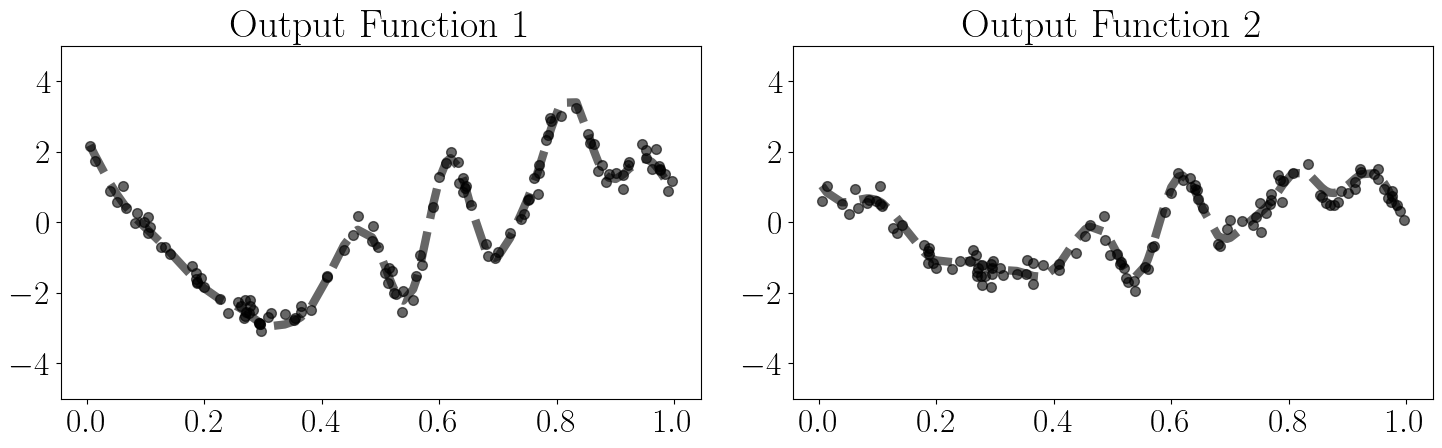

Random Seed: 27


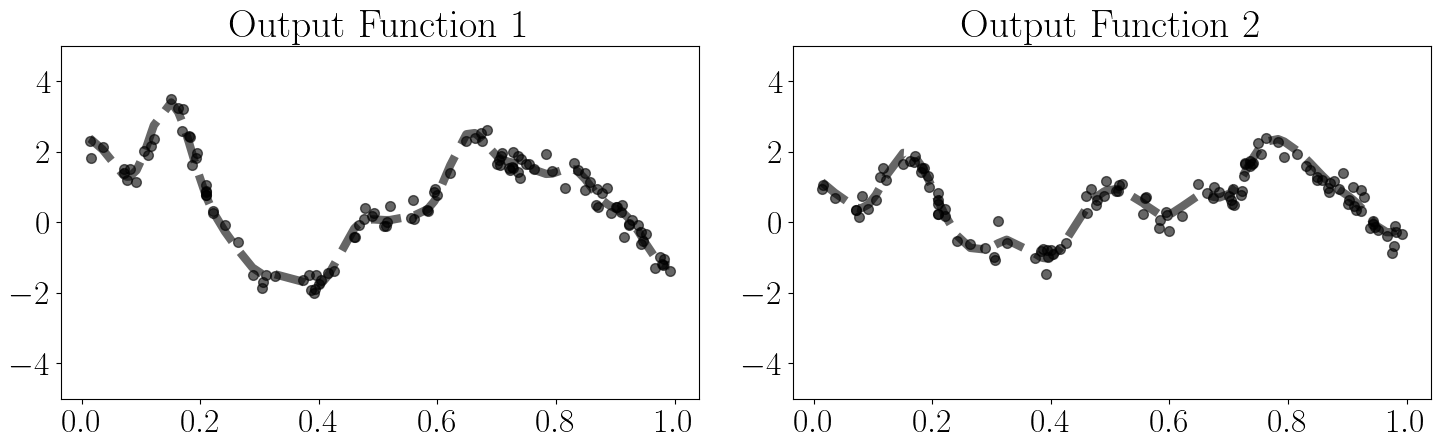

Random Seed: 28


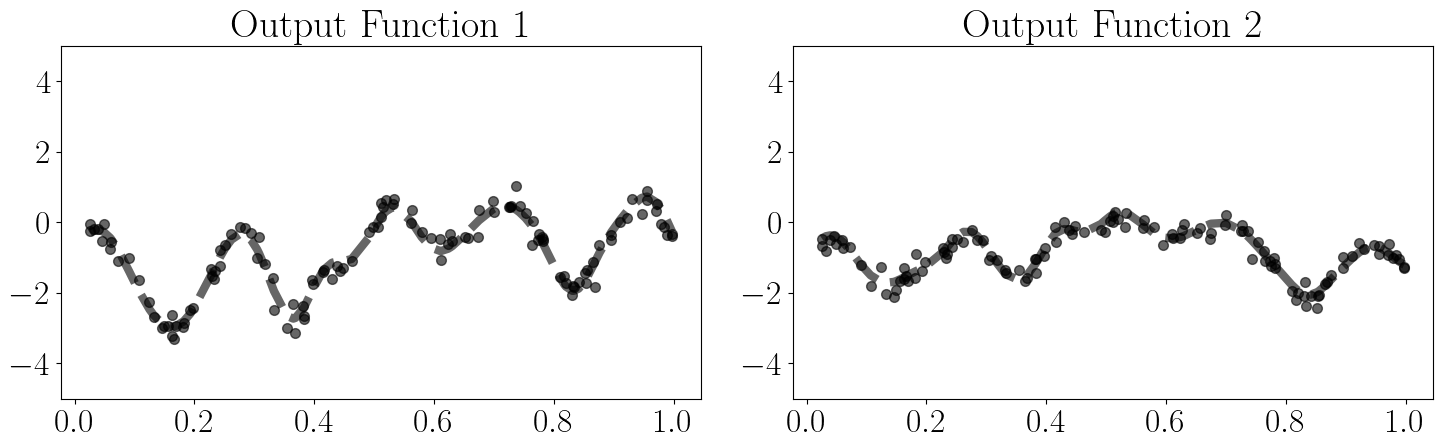

Random Seed: 29


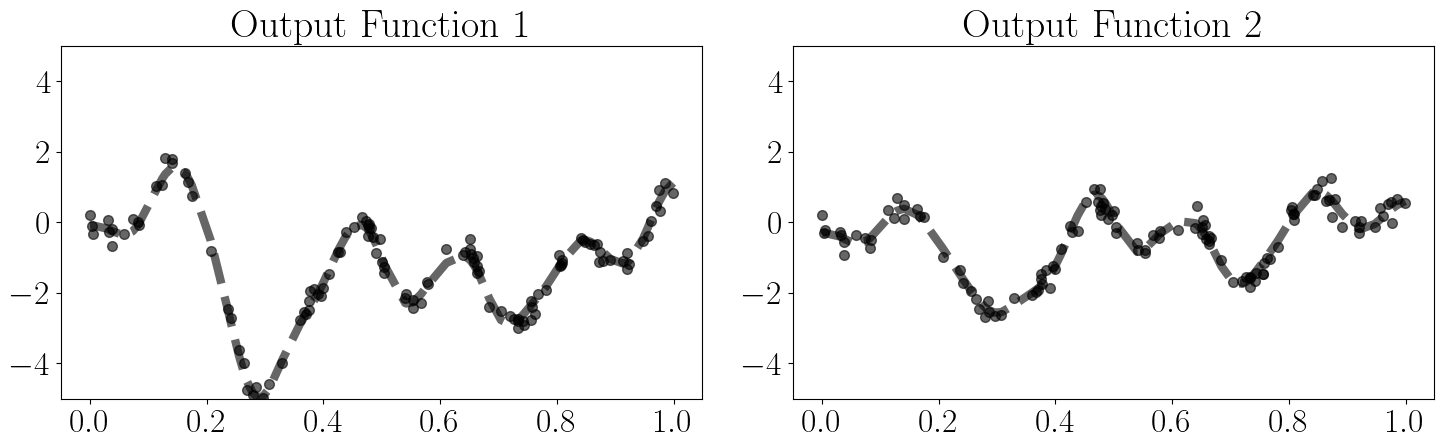

Random Seed: 30


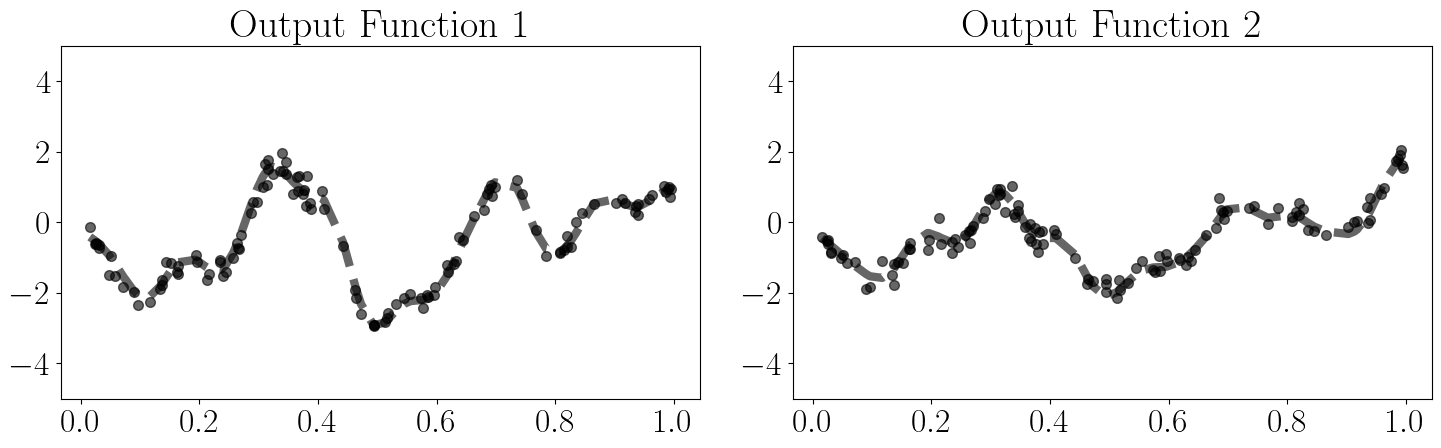

Random Seed: 31


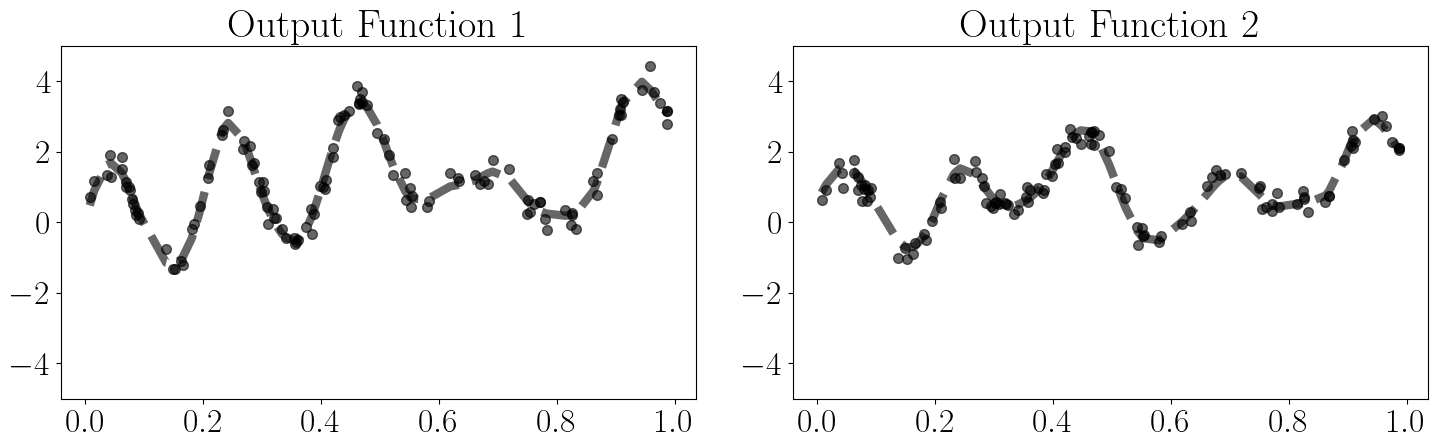

Random Seed: 32


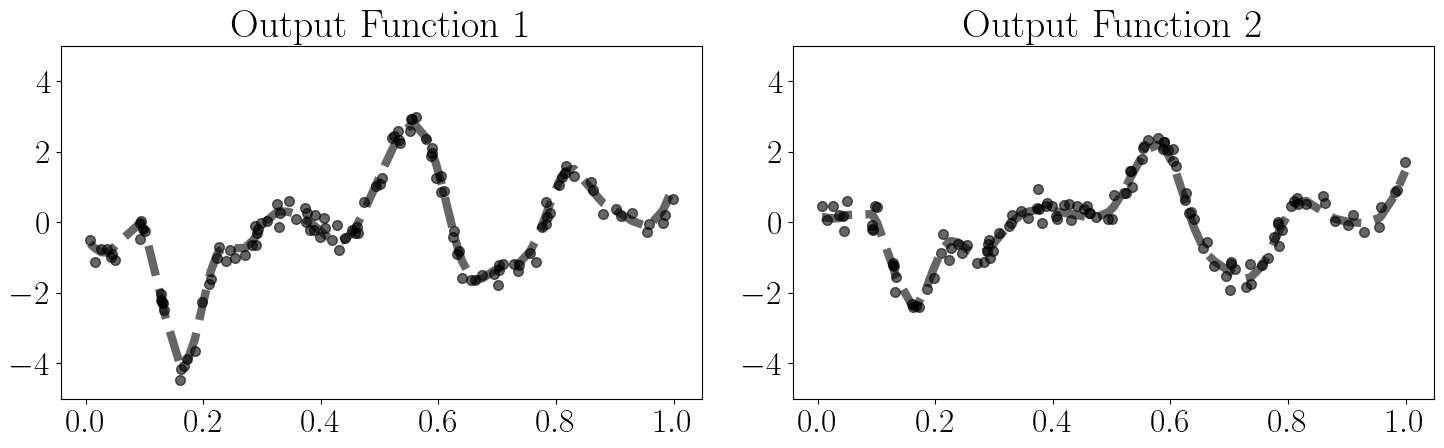

Random Seed: 33


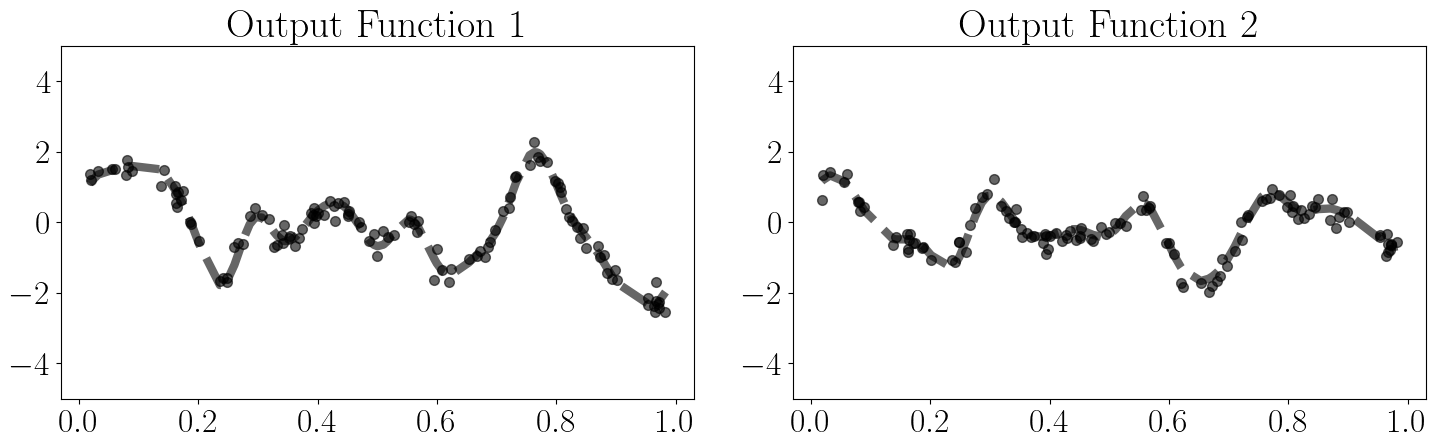

Random Seed: 34


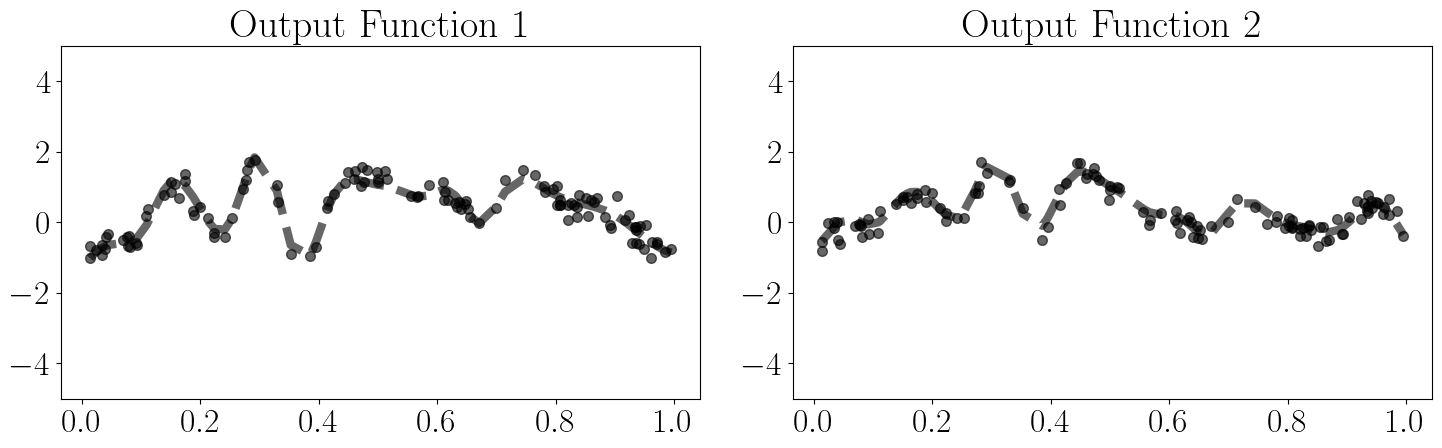

Random Seed: 35


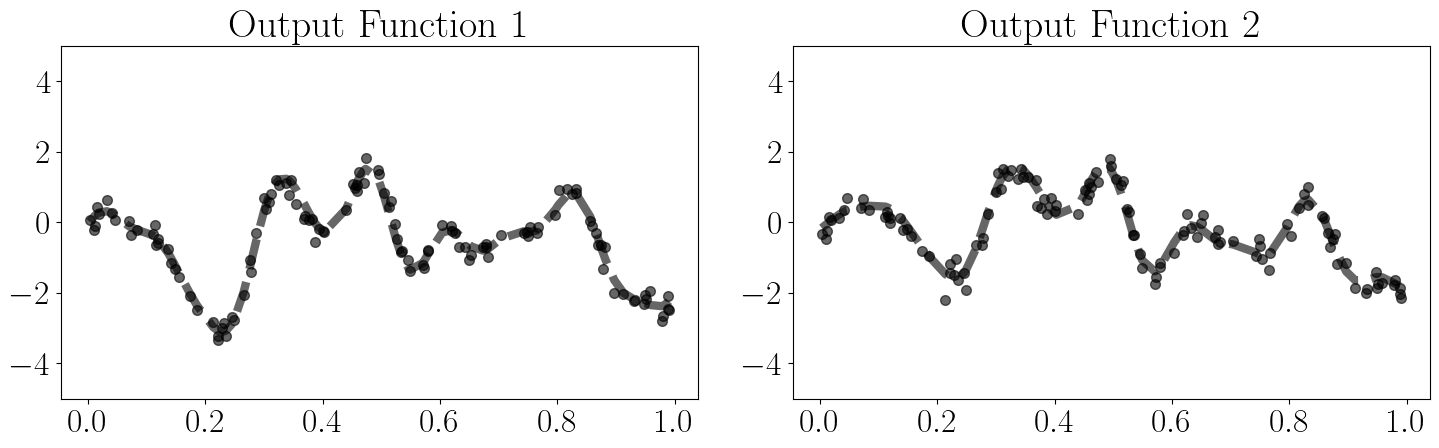

Random Seed: 36


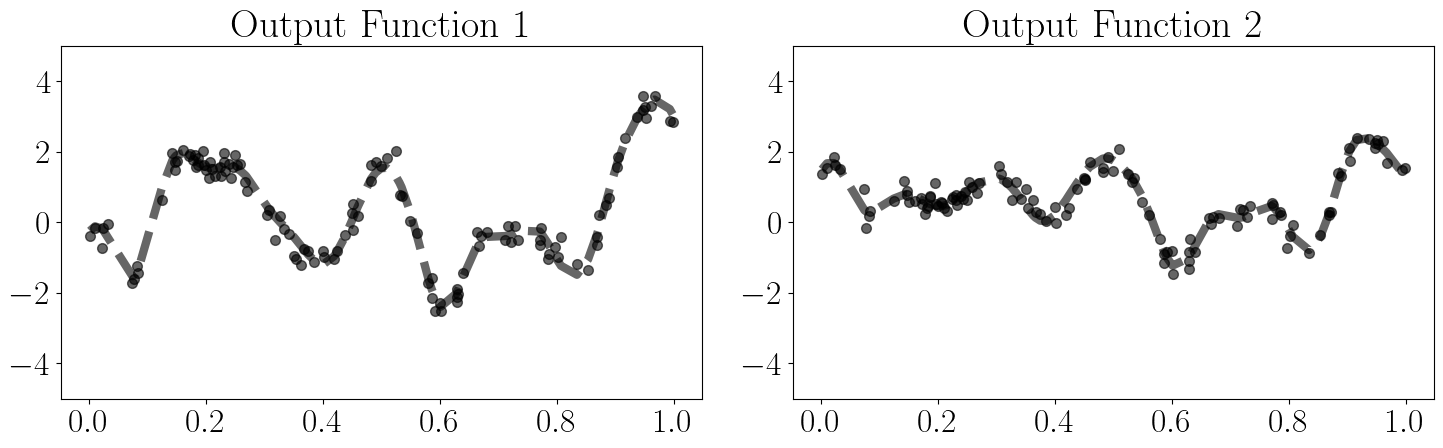

Random Seed: 37


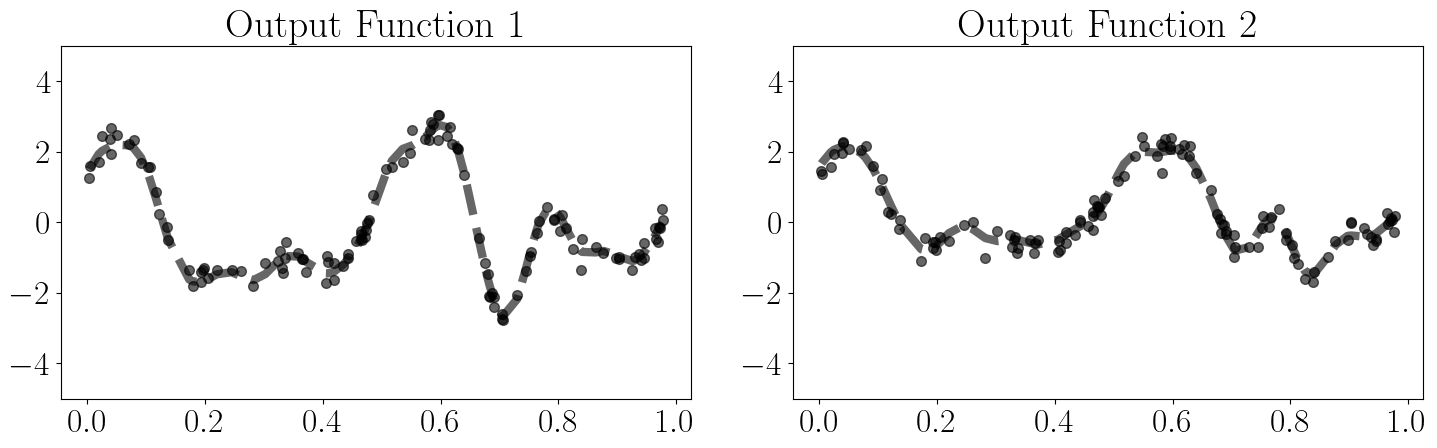

Random Seed: 38


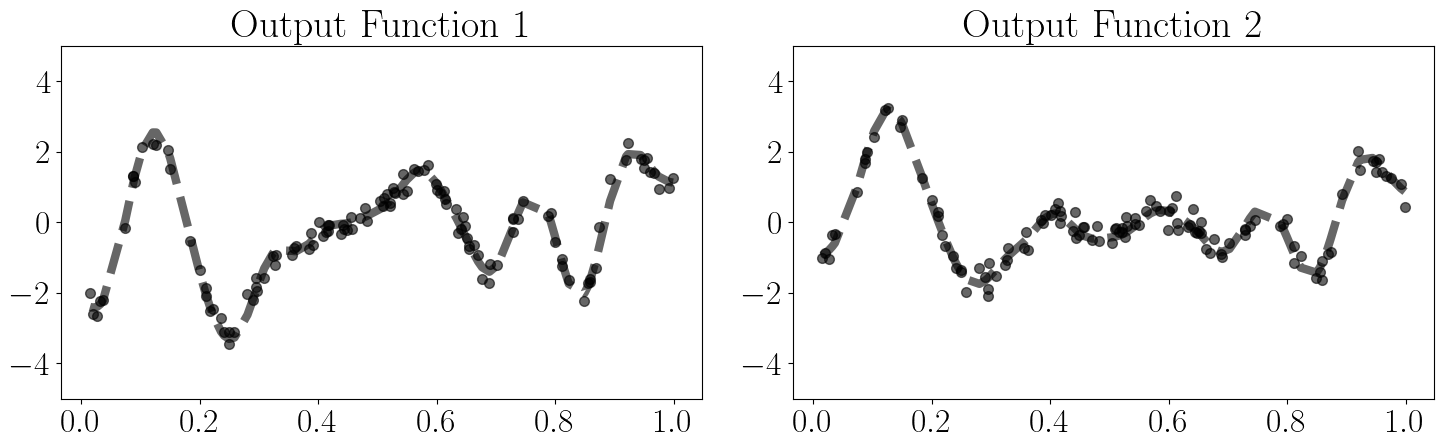

Random Seed: 39


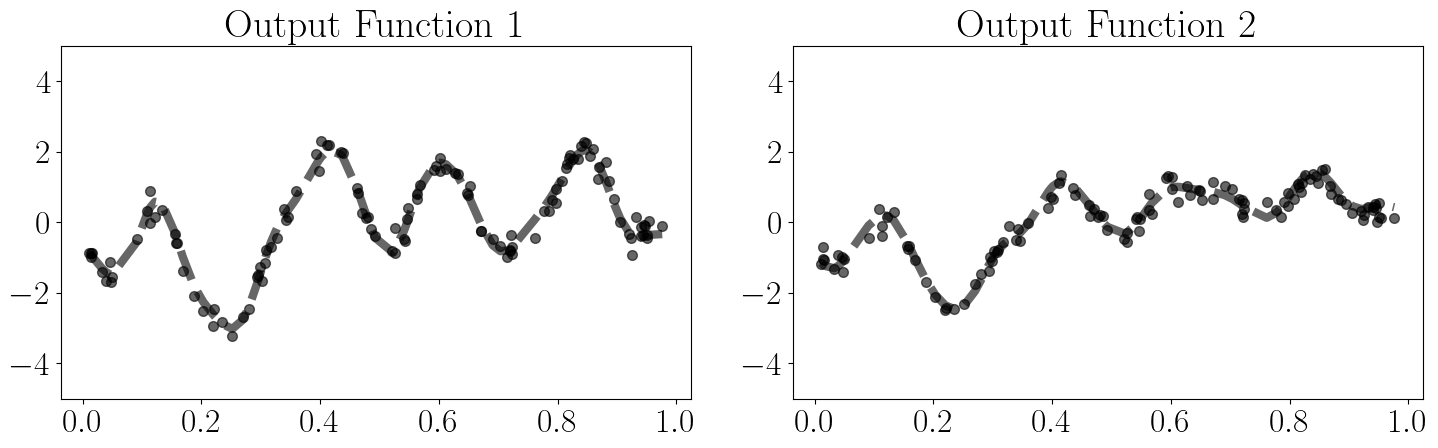

In [101]:
for i in range(40):
    print(f"Random Seed: {i}")
    np.random.seed(i)
    # Initialisation
    epsilon = 0.05
    constant_mean = 0
    length_scale = 0.05
    variance = 1
    n_outputs = 2
    n_points = 120
    overlap_ratio = 1

    A = np.array([[1.414, 0], 
        [0.849, 0.529]])
    B = A @ A.T
    # print(B)

    D = B.shape[0]

    rbf_kernel = RBFKernel(lengthscale=length_scale, variance=1)
    mean_func = ConstantMean(constant=constant_mean)

    noise_var = 0.05

    x_train = np.sort(np.random.uniform(0, 1, n_points)).reshape(-1, 1)
    N = len(x_train)
    kernel_train = rbf_kernel(x_train, x_train)
    K_train = np.kron(B, kernel_train)
    f_train = np.random.multivariate_normal(np.tile(mean_func(x_train).flatten(), D), K_train).reshape(D, -1).T  # shape (n_points, D)

    # observed y with noise
    y_train = f_train + np.random.normal(0, np.sqrt(noise_var), size=(n_points, D))

    # outlier_range = np.where((x_train >= 0.48) & (x_train <= 0.6))[0]
    # outlier_indices = np.random.choice(outlier_range, int(epsilon*n_points), replace=False)
    # y_train[outlier_indices, 0] = np.random.normal(loc=-3, scale=0.5, size=outlier_indices.shape[0])

    # mask = np.ones(len(x_train), dtype=bool)
    # mask[outlier_indices] = False

    # y_train -= np.mean(y_train, axis=0)

    # x_test = np.linspace(0, 1, 1000).reshape(-1, 1)

    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    for i in range(2):
        axs[i].plot(x_train.flatten(), y_train[:, i], 'o', color='black', alpha=0.6, label=f'Output {i+1}')
        axs[i].plot(x_train.flatten(), f_train[:, i], '--', color='black', alpha=0.6, label=f'Output {i+1}')
        # if i == 0:
            # axs[i].plot(x_train.flatten()[~mask], y_train[:, i][~mask], 'o', color='red', label='Outlier points')
        axs[i].set_title(f"Output Function {i+1}")
        axs[i].set_ylim([-5, 5])
        # axs[i].legend()

    plt.tight_layout()
    plt.show()

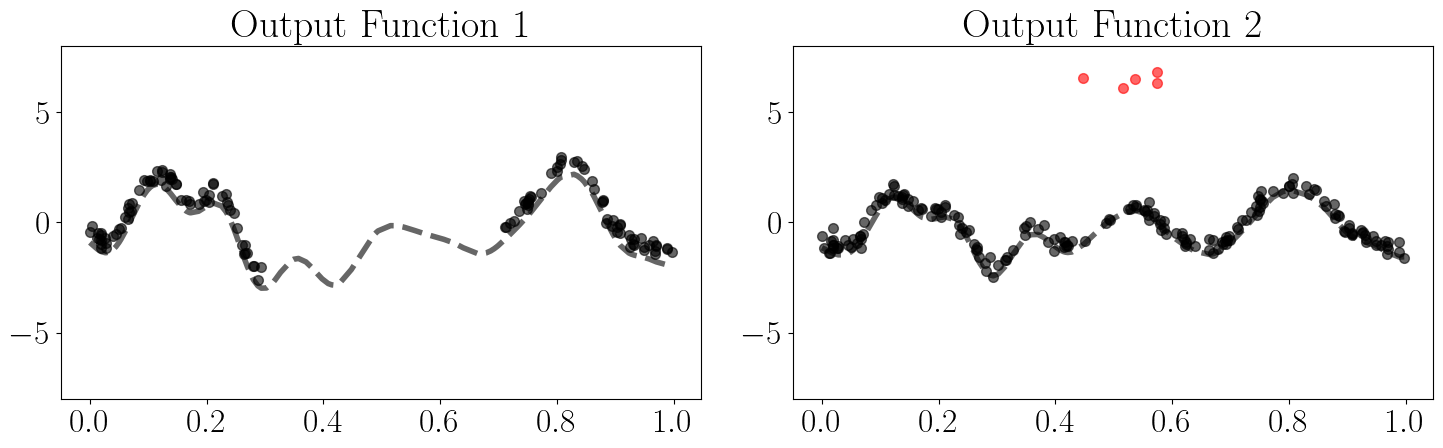

In [92]:
np.random.seed(1)
# Initialisation
epsilon = 0.025
constant_mean = 0
length_scale = 0.05
variance = 1
n_outputs = 2
n_points = 200
overlap_ratio = 1

A = np.array([[1.414, 0], 
    [0.849, 0.529]])
B = A @ A.T
# print(B)

D = B.shape[0]

rbf_kernel = RBFKernel(lengthscale=length_scale, variance=1)
mean_func = ConstantMean(constant=constant_mean)

noise_var = 0.05

x_train = np.sort(np.random.uniform(0, 1, n_points)).reshape(-1, 1)
N = len(x_train)
kernel_train = rbf_kernel(x_train, x_train)
K_train = np.kron(B, kernel_train)
f_train = np.random.multivariate_normal(np.tile(mean_func(x_train).flatten(), D), K_train).reshape(D, -1).T  # shape (n_points, D)
y_train = f_train + np.random.normal(0, np.sqrt(noise_var), size=(n_points, D))

# Outliers
outlier_range = np.where((x_train >= 0.42) & (x_train <= 0.58))[0]
outlier_indices = np.random.choice(outlier_range, int(epsilon*n_points), replace=False)
y_train[outlier_indices, 1] = np.random.normal(loc=6, scale=0.5, size=outlier_indices.shape[0])

mask = np.ones(len(x_train), dtype=bool)
mask[outlier_indices] = False

y_train -= np.mean(y_train, axis=0)

# Missing values
missing_mask = ((x_train.flatten() >= 0.3) & (x_train.flatten() <= 0.7))
y_train[missing_mask, 0] = np.nan  # Set to NaN to indicate missing values

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i in range(2):
    if i == 1:
        axs[i].plot(x_train.flatten()[mask], y_train[mask, i], 'o', color='black', alpha=0.6, label=f'Output {i+1}')
        axs[i].plot(x_train.flatten()[~mask], y_train[~mask, i], 'o', color='red', alpha=0.6, label='Outlier points')
    else:
        axs[i].plot(x_train.flatten(), y_train[:, i], 'o', color='black', alpha=0.6, label=f'Output {i+1}')
    axs[i].plot(x_train.flatten(), f_train[:, i], '--', color='black', alpha=0.6, label=f'Output {i+1}', linewidth=4)
    # if i == 0:
        # axs[i].plot(x_train.flatten()[~mask], y_train[:, i][~mask], 'o', color='red', label='Outlier points')
    axs[i].set_title(f"Output Function {i+1}")
    axs[i].set_ylim([-8, 8])
    # axs[i].legend()

plt.tight_layout()
plt.show()

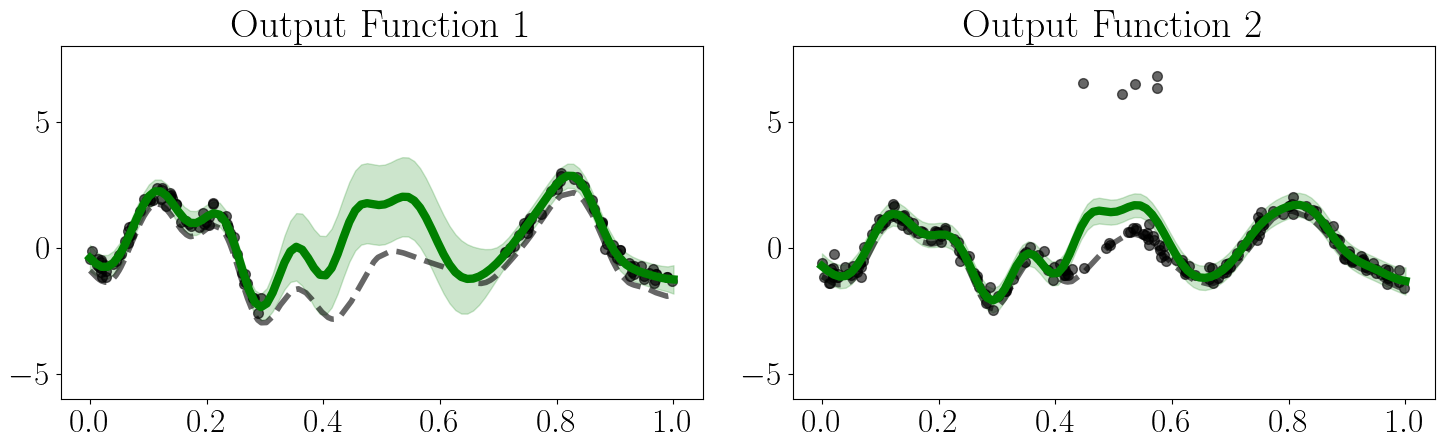

In [93]:
mogp = MOGPRegressor(mean = 0, length_scale=length_scale, noise = np.array([noise_var] * 2), A=A)
# mogp = MOGPRegressor_NC(mean = 0, length_scale=0.1, noise = 0.04, A=A)
mogp.fit(x_train, y_train)

# Predict on test points
x_test = np.linspace(0, 1, 100).reshape(-1, 1)
mu_mogp, var_mogp = mogp.predict(x_test)
std_mogp = np.sqrt(var_mogp + mogp.noise)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i in range(2):
    axs[i].plot(x_train.flatten(), y_train[:, i], 'o', color='black', label=f'Observed Data', alpha=0.6)
    axs[i].plot(x_train.flatten(), f_train[:, i], '--', color='black', alpha=0.6, label=f'Output {i+1}', linewidth=4)

    axs[i].plot(x_test.flatten(), mu_mogp[:, i], '-', color='green', label=f'Predicted Mean')
    axs[i].fill_between(x_test.flatten(), mu_mogp[:, i] - 2*std_mogp[:, i], mu_mogp[:, i] + 2*std_mogp[:, i], color='green', alpha=0.2, label=f'±2 Std. Dev.')



    axs[i].set_title(f"Output Function {i+1}")
    axs[i].set_ylim([-6, 8])
    # axs[i].legend()

plt.tight_layout()
plt.show()

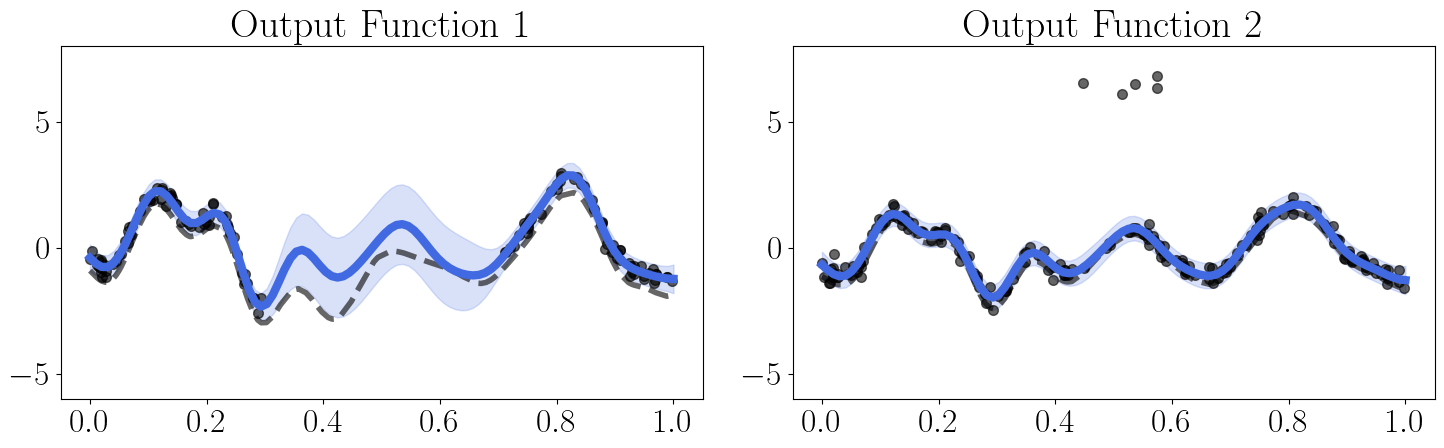

In [ ]:
morcgp = MORCGP(mean = 0, length_scale=length_scale, noise_var = np.array([noise_var] * 2), A=A)
gamma, c = morcgp.fit(x_train, y_train, epsilons=np.array([0, epsilon]))

# Predict on test points
mu_morcgp, var_morcgp = morcgp.predict(x_test)
std_morcgp = np.sqrt(var_morcgp + morcgp.noise_var)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i in range(2):
    axs[i].plot(x_train.flatten(), y_train[:, i], 'o', color='black', label=f'Observed Data', alpha=0.6)
    axs[i].plot(x_train.flatten(), f_train[:, i], '--', color='black', alpha=0.6, label=f'Output {i+1}', linewidth=4)

    axs[i].plot(x_test.flatten(), mu_morcgp[:, i], '-', color='RoyalBlue', label=f'Predicted Mean')
    axs[i].fill_between(x_test.flatten(), mu_morcgp[:, i] - 2*std_morcgp[:, i], mu_morcgp[:, i] + 2*std_morcgp[:, i], color='RoyalBlue', alpha=0.2, label=f'±2 Std. Dev.')



    axs[i].set_title(f"Output Function {i+1}")
    axs[i].set_ylim([-6, 8])
    # axs[i].legend()

plt.tight_layout()
plt.show()

In [4]:
for i in range(40):
    print(f"Random Seed: {i}")
    np.random.seed(i)
    # Initialisation
    epsilon = 0.025
    constant_mean = 0
    length_scale = 0.05
    variance = 1
    n_outputs = 2
    n_points = 120
    overlap_ratio = 1

    A = np.array([[1.414, 0], 
        [0.849, 0.529]])
    B = A @ A.T
    # print(B)

    D = B.shape[0]

    rbf_kernel = RBFKernel(lengthscale=length_scale, variance=1)
    mean_func = ConstantMean(constant=constant_mean)

    noise_var = 0.05

    x_train = np.sort(np.random.uniform(0, 1, n_points)).reshape(-1, 1)
    N = len(x_train)
    kernel_train = rbf_kernel(x_train, x_train)
    K_train = np.kron(B, kernel_train)
    f_train = np.random.multivariate_normal(np.tile(mean_func(x_train).flatten(), D), K_train).reshape(D, -1).T  # shape (n_points, D)
    y_train = f_train + np.random.normal(0, np.sqrt(noise_var), size=(n_points, D))

    x_test = np.linspace(0, 1, 100).reshape(-1, 1)

    # Outliers
    outlier_range = np.where((x_train >= 0.45) & (x_train <= 0.55))[0]
    outlier_indices = np.random.choice(outlier_range, int(epsilon*n_points), replace=False)
    y_train[outlier_indices, 1] = np.random.normal(loc=8, scale=0.5, size=outlier_indices.shape[0])

    mask = np.ones(len(x_train), dtype=bool)
    mask[outlier_indices] = False

    y_train -= np.mean(y_train, axis=0)
    f_train -= np.mean(y_train, axis=0)

    # Missing values
    missing_mask = ((x_train.flatten() >= 0.3) & (x_train.flatten() <= 0.7))
    y_train[missing_mask, 0] = np.nan  # Set to NaN to indicate missing values

    # Running model
    morcgp = MORCGP(mean = 0, length_scale=length_scale, noise_var = np.array([noise_var] * 2), A=A)
    gamma, c = morcgp.fit(x_train, y_train, epsilons=np.array([0, epsilon]))
    mu_morcgp, var_morcgp = morcgp.predict(x_test)
    std_morcgp = np.sqrt(var_morcgp + morcgp.noise_var)

    mogp = MOGPRegressor(mean = 0, length_scale=length_scale, noise = np.array([noise_var] * 2), A=A)
    mogp.fit(x_train, y_train)
    mu_mogp, var_mogp = mogp.predict(x_test)
    std_mogp = np.sqrt(var_mogp + mogp.noise)

    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    for i in range(2):
        axs[i].plot(x_train.flatten(), y_train[:, i], 'o', color='black', label=f'Observed Data', alpha=0.6)
        axs[i].plot(x_train.flatten(), f_train[:, i], '--', color='black', alpha=0.6, label=f'Output {i+1}', linewidth=4)

        axs[i].plot(x_test.flatten(), mu_morcgp[:, i], '-', color='RoyalBlue', label=f'Predicted Mean')
        # axs[i].fill_between(x_test.flatten(), mu_morcgp[:, i] - 2*std_morcgp[:, i], mu_morcgp[:, i] + 2*std_morcgp[:, i], color='RoyalBlue', alpha=0.2, label=f'±2 Std. Dev.')

        axs[i].plot(x_test.flatten(), mu_mogp[:, i], '-', color='green', label=f'Predicted Mean')
        # axs[i].fill_between(x_test.flatten(), mu_mogp[:, i] - 2*std_mogp[:, i], mu_mogp[:, i] + 2*std_mogp[:, i], color='green', alpha=0.2, label=f'±2 Std. Dev.')

        axs[i].set_title(f"Output Function {i+1}")
        axs[i].set_ylim([-8, 10])
        # axs[i].legend()

    plt.tight_layout()
    plt.show()

Random Seed: 0


ValueError: operands could not be broadcast together with shapes (2,) (240,240) 

In [3]:
np.random.seed(1)
# Initialisation
epsilon = 0.025
constant_mean = 0
length_scale = 0.05
variance = 1
n_outputs = 2
n_points = 120
overlap_ratio = 1

A = np.array([[1.414, 0], 
    [0.849, 0.529]])
B = A @ A.T
# print(B)

D = B.shape[0]

rbf_kernel = RBFKernel(lengthscale=length_scale, variance=1)
mean_func = ConstantMean(constant=constant_mean)

noise_var = 0.05

x_train = np.sort(np.random.uniform(0, 1, n_points)).reshape(-1, 1)
N = len(x_train)
kernel_train = rbf_kernel(x_train, x_train)
K_train = np.kron(B, kernel_train)
f_train = np.random.multivariate_normal(np.tile(mean_func(x_train).flatten(), D), K_train).reshape(D, -1).T  # shape (n_points, D)
y_train = f_train + np.random.normal(0, np.sqrt(noise_var), size=(n_points, D))

x_test = np.linspace(0, 1, 100).reshape(-1, 1)

# Outliers
outlier_range = np.where((x_train >= 0.45) & (x_train <= 0.55))[0]
outlier_indices = np.random.choice(outlier_range, int(epsilon*n_points), replace=False)
y_train[outlier_indices, 1] = np.random.normal(loc=5, scale=0.5, size=outlier_indices.shape[0])

mask = np.ones(len(x_train), dtype=bool)
mask[outlier_indices] = False

f_train -= np.mean(y_train, axis=0)
y_train -= np.mean(y_train, axis=0)

# Missing values
missing_mask = ((x_train.flatten() >= 0.3) & (x_train.flatten() <= 0.7))
y_train[missing_mask, 0] = np.nan  # Set to NaN to indicate missing values

# Running model
morcgp = MORCGP(mean = 0, length_scale=length_scale, noise_var = np.array([noise_var] * 2), A=A)
gamma, c = morcgp.fit(x_train, y_train, epsilons=np.array([0, epsilon]))
mu_morcgp, var_morcgp = morcgp.predict(x_test)
std_morcgp = np.sqrt(var_morcgp + morcgp.noise_var)

mogp = MOGPRegressor(mean = 0, length_scale=length_scale, noise = np.array([noise_var] * 2), A=A)
mogp.fit(x_train, y_train)
mu_mogp, var_mogp = mogp.predict(x_test)
std_mogp = np.sqrt(var_mogp + mogp.noise)

# # Plotting
# fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# for i in range(2):
#     axs[i].plot(x_train.flatten(), y_train[:, i], 'o', color='black', label=f'Observed Data', alpha=0.6)
#     axs[i].plot(x_train.flatten(), f_train[:, i], '--', color='black', alpha=0.6, label=f'Output {i+1}', linewidth=4)

#     axs[i].plot(x_test.flatten(), mu_morcgp[:, i], '-', color='RoyalBlue', label=f'Predicted Mean')
#     axs[i].fill_between(x_test.flatten(), mu_morcgp[:, i] - 2*std_morcgp[:, i], mu_morcgp[:, i] + 2*std_morcgp[:, i], color='RoyalBlue', alpha=0.2, label=f'±2 Std. Dev.')

#     axs[i].plot(x_test.flatten(), mu_mogp[:, i], '-', color='green', label=f'Predicted Mean')
#     axs[i].fill_between(x_test.flatten(), mu_mogp[:, i] - 2*std_mogp[:, i], mu_mogp[:, i] + 2*std_mogp[:, i], color='green', alpha=0.2, label=f'±2 Std. Dev.')

#     axs[i].set_title(f"Output Function {i+1}")
#     axs[i].set_ylim([-8, 10])
#     # axs[i].legend()

# plt.tight_layout()
# plt.show()

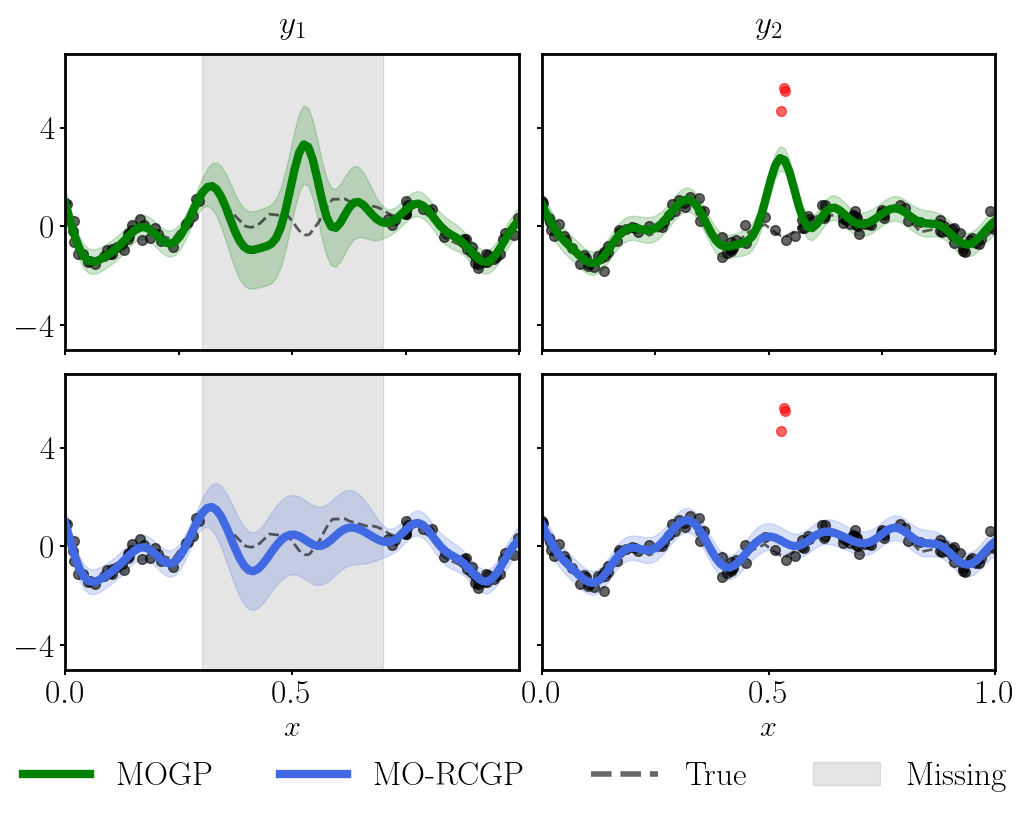

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for j in range(2):  # models: 0 = MOGP, 1 = MORCGP
    for i in range(2):  # outputs: 0 = y1, 1 = y2
        ax = axs[j, i]

        # --- plotting data points ---
        if i == 1:
            ax.plot(x_train.flatten()[mask], y_train[mask, i], 'o', color='black', alpha=0.6)
            ax.plot(x_train.flatten()[~mask], y_train[~mask, i], 'o', color='red', alpha=0.6, label='Outlier points')
        else:
            ax.plot(x_train.flatten(), y_train[:, i], 'o', color='black', alpha=0.6)

        ax.plot(x_train.flatten(), f_train[:, i], '--', color='black', alpha=0.6, linewidth=2)

        # --- plotting model predictions ---
        if j == 0:  # MOGP row
            ax.plot(x_test.flatten(), mu_mogp[:, i], '-', color='green', label='Predicted Mean (MOGP)')
            ax.fill_between(x_test.flatten(),
                            mu_mogp[:, i] - 2 * std_mogp[:, i],
                            mu_mogp[:, i] + 2 * std_mogp[:, i],
                            color='green', alpha=0.2, label='±2 Std. Dev.')
            ax.set_ylim([-5, 7])
            ax.set_yticks([-4, 0, 4])
            # Set titles only for top row
            if i == 0:
                ax.set_title(r'$y_1$', pad=15)
            else:
                ax.set_title(r'$y_2$', pad=15)
        else:  # MORCGP row
            ax.plot(x_test.flatten(), mu_morcgp[:, i], '-', color='RoyalBlue', label='Predicted Mean (MORCGP)')
            ax.fill_between(x_test.flatten(),
                            mu_morcgp[:, i] - 2 * std_morcgp[:, i],
                            mu_morcgp[:, i] + 2 * std_morcgp[:, i],
                            color='RoyalBlue', alpha=0.2, label='±2 Std. Dev.')
            ax.set_ylim([-5, 7])
            ax.set_yticks([-4, 0, 4])

                # --- formatting ticks ---
        if j == 0:  # top row → no x labels
            ax.set_xticklabels([])
        else:  # bottom row
            if i == 0:  # bottom left
                ax.set_xticks([0, 0.5])
            else:       # bottom right
                ax.set_xticks([0, 0.5, 1])
            
            # --- set x-axis label ---
            ax.set_xlabel('$x$')

        if i == 1:  # right column → no y labels
            ax.set_yticklabels([])

        # --- add grey background for first column ---
        if i == 0:
            ax.axvspan(0.3, 0.7, color='grey', alpha=0.2, zorder=0)

        ax.set_xlim([0, 1])

for ax_row in axs:
    for ax in ax_row:
        for spine in ax.spines.values():
            spine.set_linewidth(2)   # increase thickness (default is 0.8)
            ax.tick_params(width=1.4, length=3.5)

# --- add shared legend below all plots ---
mogp_line = mlines.Line2D([], [], color='green', label='MOGP')
morcgp_line = mlines.Line2D([], [], color='RoyalBlue', label='MO-RCGP')
true_line = mlines.Line2D([], [], color='black', linestyle='--', label='True', alpha=0.6, linewidth=4)
grey_patch = mpatches.Patch(color='grey', alpha=0.2, label='Missing')

fig.legend(handles=[mogp_line, morcgp_line, true_line, grey_patch],
           loc='lower center',
           ncol=4,
           bbox_to_anchor=(0.5, -0.08),
           frameon=False)


plt.subplots_adjust(wspace=0.05, hspace=0.08)
plt.show()

fig.savefig("./results/toy_example_missing_values2.pdf", format='pdf', bbox_inches='tight')